# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#To see all the columns 
pd.set_option('display.max_columns', None)


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df = pd.read_parquet('/Users/sangeetchoubey/a) Upgrad/b) SQL & Statitistics Essentials/c) EDA NYC Taxi/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# # Take a small percentage of entries from each hour of every date.
# # Iterating through the monthly data:
# #   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# # Create a single dataframe for the year combining all the monthly data

# # Select the folder having data files
# import os

# # Select the folder having data files
# os.chdir('/Users/sangeetchoubey/a) Upgrad/b) SQL & Statitistics Essentials/c) EDA NYC Taxi/Datasets and Dictionary/trip_records')

# # Create a list of all the twelve files to read
# file_list = os.listdir()

# # initialise an empty dataframe
# df = pd.DataFrame()


# # iterate through the list of files and sample one by one:
# for file_name in file_list:
    
#     try:
#         # file path for the current file
#         file_path = os.path.join(os.getcwd(), file_name)

#         # Reading the current file
#         data = pd.read_parquet(file_path)
        
#         data['pickup_hour']= data.tpep_pickup_datetime.dt.hour
#         data['pickup_date']= data.tpep_pickup_datetime.dt.date
        
#         unique_dates= data.pickup_date.unique()
#         sample_hour_list=[]
#         sample_file_df= pd.DataFrame()
        
#         sample_file_df=data.groupby(['pickup_date', 'pickup_hour'], group_keys=False).apply\
#             (lambda x: x.sample(frac=0.05, random_state=42))
    
#         # Concatenate the sampled data of all the dates to a single datafram

#         df=pd.concat([df,sample_file_df])
         

#     except Exception as e:
#         print(f"Error reading file {file_name}: {e}")

In [9]:
# df

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# # Store the df in csv/parquet
# df.to_parquet('yellow_taxi_nyc_2023')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file

df = pd.read_parquet('/Users/sangeetchoubey/a) Upgrad/b) SQL & Statitistics Essentials/c) EDA NYC Taxi/Datasets and Dictionary/trip_records/yellow_taxi_nyc_2023')

In [12]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3791            2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1871            2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3791              1.31         1.0                  N           163   
1871              1.22         1.0                  N           161   
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3791              162             1        10.00    1.0      0.5        3.00   
1871              229             1         9.30    1.0      0.5        1.43   
1788               50             1        23.30    1.0      0.5        5.66   
3196699            61             0        22.43    0.0      0.5        3.00   
1408              161             1        10.70    1.0      0.5        3.14   

         tolls_amount  improvement_surcharge  total_amount  \
3791              0.0                    1.0         18.00   
1871              0.0                    1.0         15.73   
1788              0.0                    1.0         33.96   
3196699           0.0                    1.0         29.43   
1408              0.0                    1.0         18.84   

         congestion_surcharge  Airport_fee  pickup_hour          pickup_date  \
3791                      2.5          0.0           23  1701302400000000000   
1871                      2.5          0.0           23  1701302400000000000   
1788                      2.5          0.0            0  1701388800000000000   
3196699                   NaN          NaN            0  1701388800000000000   
1408                      2.5          0.0            0  1701388800000000000   

         airport_fee  
3791             NaN  
1871             NaN  
1788             NaN  
3196699          NaN  
1408             NaN

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 3791 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [14]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


In [15]:
## dropping pickup_date 
df.drop(columns=['pickup_date'], inplace=True)


In [16]:
# Adding trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# df2 = df[['Airport_fee','airport_fee']].fillna(0)
# df2[(df2.Airport_fee>=0) & (df2.airport_fee==0) ]

In [18]:
## There is no cases where both Airport_fee and airport_fee are greater than zero, so possibly some values 
# were entered in Airport_fee and other in airport_fee, adding these two fields to get updated one 

In [19]:
df.loc[:,'airport_fee_updated'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)

In [20]:
# Dropping airport_fee and Airport_fee from data, since they are combined into a single column
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
# check where values of fare amount are negative

df[df.fare_amount<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, trip_duration, airport_fee_updated]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts

## No records for negative fare amount in the data


In [23]:
# Find which columns have negative values

# Getting only numeric columns
numeric_df = df.select_dtypes(include='number')



In [24]:
# Finding numeric columns have any negative values
negative_cols = numeric_df.columns[(numeric_df < 0).any()]


print("Columns with negative values:", list(negative_cols))

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration', 'airport_fee_updated']


In [25]:
print("Columns with negative values:", list(negative_cols))

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration', 'airport_fee_updated']


In [26]:
# fix these negative values
df[negative_cols] = df[negative_cols].apply(lambda col: col.apply(lambda val: val if val >= 0 else -val))


Since these field values cannot be negative,we have taken the absolute values of these fields


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [27]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
pickup_hour              0.000000
trip_duration            0.000000
airport_fee_updated      0.000000
dtype: float64


passenger_count,RatecodeID , store_and_fwd_flag and congestion_surcharge are only columns having missing values

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [28]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
5               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
29              2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
124             2  2023-12-01 00:02:18   2023-12-01 00:12:25              NaN   
129             1  2023-12-01 00:04:14   2023-12-01 00:25:16              NaN   
...           ...                  ...                   ...              ...   
1896293         1  2023-06-30 23:14:07   2023-06-30 23:25:45              NaN   
1896309         2  2023-06-30 23:40:46   2023-07-01 00:04:37              NaN   
1896352         2  2023-06-30 23:57:33   2023-07-01 00:09:15              NaN   
1896373         2  2023-06-30 23:36:40   2023-06-30 23:53:20              NaN   
1896383         1  2023-06-30 23:34:22   2023-07-01 00:32:59              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3                 4.79         NaN               None           231   
5                 2.08         NaN               None           137   
29                3.49         NaN               None           164   
124               1.79         NaN               None           142   
129               0.00         NaN               None           186   
...                ...         ...                ...           ...   
1896293           0.70         NaN               None           230   
1896309           4.46         NaN               None           143   
1896352           2.75         NaN               None           166   
1896373           5.18         NaN               None           148   
1896383          20.20         NaN               None           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3                  61             0        22.43   0.00      0.5        3.00   
5                 144             0        17.22   0.00      0.5        0.00   
29                262             0        17.83   0.00      0.5        0.00   
124               239             0         9.88   0.00      0.5        0.00   
129                74             0        30.31   0.00      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896293           186             0        11.40   1.00      0.5        2.46   
1896309            79             0        23.26   0.00      0.5        0.00   
1896352           142             0        16.14   0.00      0.5        0.00   
1896373           237             0        26.09   0.00      0.5        3.01   
1896383            74             0        70.00   1.75      0.5       11.97   

         tolls_amount  improvement_surcharge  total_amount  \
3                0.00                    1.0         29.43   
5                0.00                    1.0         21.22   
29               0.00                    1.0         21.83   
124              0.00                    1.0         13.88   
129              0.00                    1.0         34.31   
...               ...                    ...           ...   
1896293          0.00                    1.0         18.86   
1896309          0.00                    1.0         27.26   
1896352          0.00                    1.0         20.14   
1896373          0.00                    1.0         33.10   
1896383          6.55                    1.0         91.77   

         congestion_surcharge  pickup_hour  trip_duration  airport_fee_updated  
3                         NaN            0      23.116667                  0.0  
5                         NaN            0      13.783333                  0.0  
29                        NaN            0      14.700000                  0.0  
124                       NaN            0      10.116667                  0.0  
129                       NaN            0      21.033333               

In [29]:
# getting different values and their counts in passenger_count 
df.passenger_count.value_counts(dropna=False)

passenger_count
1.0    1377224
2.0     277298
3.0      69034
NaN      64874
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

Will impute the missing passenger values with median of passenger count

In [30]:
passenger_count_median = df['passenger_count'].median()
df.loc[:,'passenger_count'] = df['passenger_count'].fillna(passenger_count_median)

Did you find zeroes in passenger_count? Handle these.

There are about 29681 records with zero passengers,which seems like data entry issues, hence removing
these records from data 


In [31]:
df = df[df['passenger_count'] != 0]


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [32]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     1700728
2.0       70889
NaN       64874
99.0      10437
5.0       10054
3.0        6044
4.0        3690
6.0           3
Name: count, dtype: int64

Will impute the missing RatecodeID with most frequent value(mode) of RatecodeID

In [33]:
RatecodeID_mode = df['RatecodeID'].mode()[0]
df.loc[:,'RatecodeID'] = df['RatecodeID'].fillna(RatecodeID_mode)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [34]:
df.congestion_surcharge.value_counts(dropna=False)


congestion_surcharge
2.5    1663111
0.0     138733
NaN      64874
0.5          1
Name: count, dtype: int64

Will impute the missing congestion_surcharge with median of congestion_surcharge

In [35]:
# handle null values in congestion_surcharge

congestion_surcharge_median = df['congestion_surcharge'].median()
df.loc[:, 'congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge_median)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [36]:
# checking whether any column is left having null values
df.columns[df.isnull().any()]

Index(['store_and_fwd_flag'], dtype='object')

There is one more column store_and_fwd_flag which has null values

In [37]:
# Handle any remaining missing values

df.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       1791511
None      64874
Y         10334
Name: count, dtype: int64

Will impute the missing store_and_fwd_flag with most frequent value(mode) of store_and_fwd_flag

In [38]:
store_and_fwd_flag_mode = df['store_and_fwd_flag'].mode()[0]
df.loc[:, 'store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [39]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID           tpep_pickup_datetime  \
count  1.866719e+06                        1866719   
mean   1.744630e+00  2023-07-02 23:55:27.648843776   
min    1.000000e+00            2022-12-31 23:51:30   
25%    1.000000e+00            2023-04-02 18:11:46   
50%    2.000000e+00            2023-06-27 19:33:44   
75%    2.000000e+00            2023-10-06 23:38:06   
max    6.000000e+00            2023-12-31 23:57:51   
std    4.414898e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1866719     1.866719e+06   1.866719e+06   
mean   2023-07-03 00:12:56.291040768     1.378154e+00   3.875073e+00   
min              2022-12-31 23:56:06     1.000000e+00   0.000000e+00   
25%       2023-04-02 18:30:24.500000     1.000000e+00   1.050000e+00   
50%              2023-06-27 19:48:19     1.000000e+00   1.800000e+00   
75%              2023-10-06 23:55:36     1.000000e+00   3.410000e+00   
max              2024-01-01 20:50:55     9.000000e+00   1.263605e+05   
std                              NaN     8.699633e-01   1.304323e+02   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  1.866719e+06  1.866719e+06  1.866719e+06  1.866719e+06  1.866719e+06   
mean   1.619860e+00  1.652476e+02  1.640227e+02  1.162286e+00  1.996151e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.228000e+01   
max    9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   
std    7.312154e+00  6.400110e+01  6.981926e+01  5.076354e-01  1.063526e+02   

              extra       mta_tax    tip_amount  tolls_amount  \
count  1.866719e+06  1.866719e+06  1.866719e+06  1.866719e+06   
mean   1.561125e+00  4.953188e-01  3.555185e+00  5.997746e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.000000e+00  5.000000e-01  2.850000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  4.450000e+00  0.000000e+00   
max    2.080000e+01  4.000000e+00  2.230800e+02  1.430000e+02   
std    1.820549e+00  4.841437e-02  4.056978e+00  2.193071e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.866719e+06  1.866719e+06          1.866719e+06   
mean            9.990699e-01  2.903798e+01          2.314201e+00   
min             0.000000e+00  0.000000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.107000e+01          2.500000e+00   
75%             1.000000e+00  3.100000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   
std             2.804481e-02  1.072285e+02          6.557255e-01   

        pickup_hour  trip_duration  airport_fee_updated  
count  1.866719e+06   1.866719e+06         1.866719e+06  
mean   1.426854e+01   1.747933e+01         1.387646e-01  
min    0.000000e+00   0.000000e+00         0.000000e+00  
25%    1.100000e+01   7.683333e+00         0.000000e+00  
50%    1.500000e+01   1.270000e+01         0.000000e+00  
75%    1.900000e+01   2.071667e+01         0.000000e+00  
max    2.300000e+01   6.266383e+03         1.750000e+00  
std    5.814584e+00   4.135851e+01         4.586941e-01

In [40]:


# Function to detect outliers using IQR
def outlier_summary(df):
    numeric_cols = df.select_dtypes(include='number').columns
    summary = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        summary.append({
            'column': col,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': outliers.count(),
            'percent_outliers': 100 * outliers.count() / df[col].count()
        })

    return pd.DataFrame(summary)

# Example usage
outlier_df = outlier_summary(df)
outlier_df


column  lower_bound  upper_bound  num_outliers  \
0                VendorID    -0.500000     3.500000           444   
1         passenger_count     1.000000     1.000000        424621   
2           trip_distance    -2.490000     6.950000        245984   
3              RatecodeID     1.000000     1.000000        101117   
4            PULocationID   -21.000000   387.000000             0   
5            DOLocationID   -66.000000   414.000000             0   
6            payment_type     1.000000     1.000000        397438   
7             fare_amount   -10.170000    41.750000        189817   
8                   extra    -3.750000     6.250000         32941   
9                 mta_tax     0.500000     0.500000         17563   
10             tip_amount    -4.175000     9.625000        143307   
11           tolls_amount     0.000000     0.000000        152213   
12  improvement_surcharge     1.000000     1.000000          2117   
13           total_amount    -6.600000    53.560000        215189   
14   congestion_surcharge     2.500000     2.500000        138734   
15            pickup_hour    -1.000000    31.000000             0   
16          trip_duration   -11.866667    40.266667        111751   
17    airport_fee_updated     0.000000     0.000000        159269   

    percent_outliers  
0           0.023785  
1          22.746916  
2          13.177345  
3           5.416830  
4           0.000000  
5           0.000000  
6          21.290725  
7          10.168483  
8           1.764647  
9           0.940849  
10          7.676945  
11          8.154039  
12          0.113408  
13         11.527659  
14          7.431970  
15          0.000000  
16          5.986493  
17          8.532029

In [41]:
outlier_df[outlier_df.column=='extra']['upper_bound'].iloc[0]

6.25

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [42]:
df['passenger_count'].hist(bins=50)
plt.xlabel('Passenger count')
plt.ylabel('Frequency')

plt.show()

In [43]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


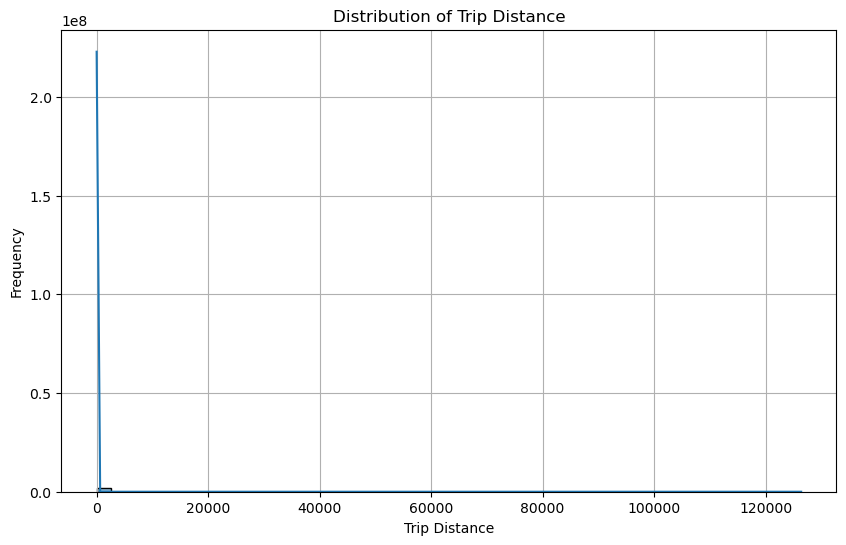

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
## Removing trip_distance > 250 miles from data 

In [46]:
df = df[df['trip_distance'] <= 250]


In [47]:
## plotting scatter plot of trip distance and fare amount to check outliers

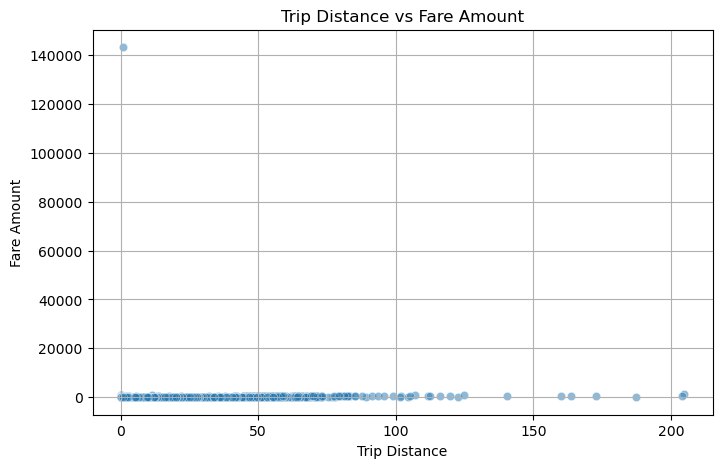

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [49]:
## Since we have outliers only for fare amount greater than 20000, we remove these cases for better visualization

In [50]:
df = df[df['fare_amount'] <= 20000]


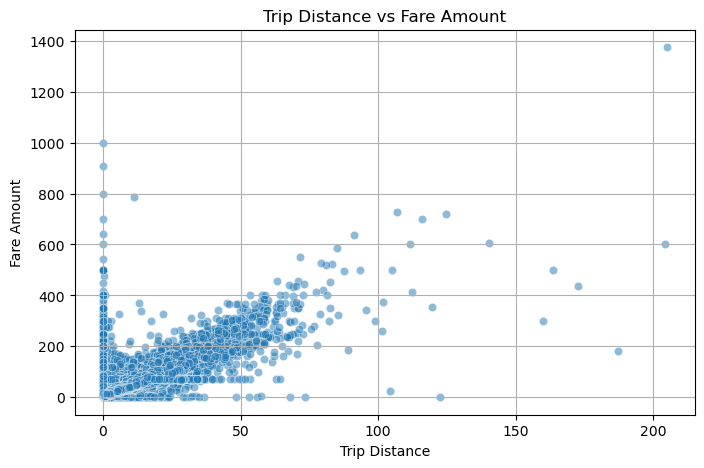

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [52]:
# Now it looks clearer, however, we can see trips where distance is ~0, however,fare amount goes up to 1000, 
# removing cases trip distance is less than 0.5 and fare amount is greater than 300

In [53]:
df= df[~((df.fare_amount>300) & (df.trip_distance<=0.5))]

In [54]:
## Outliers in payment_type

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [56]:
## since there is no payment_type=0 in the description of data, will remove these trips from data

In [57]:
df = df[df['payment_type']!=0 ]


In [58]:
# Do any columns need standardising?



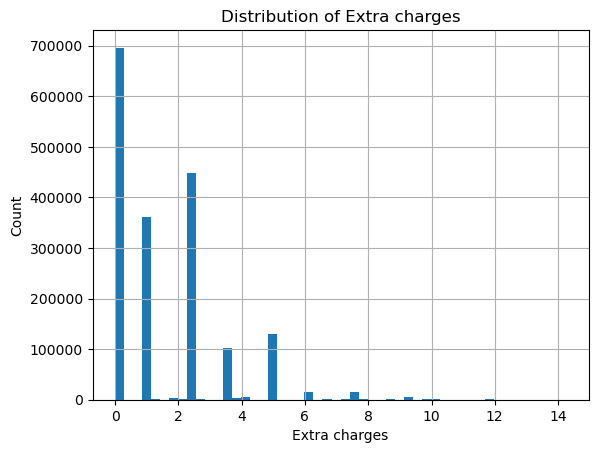

In [59]:
df['extra'].hist(bins=50)
plt.title('Distribution of Extra charges')
plt.xlabel('Extra charges')
plt.ylabel('Count')
plt.show()

In [60]:
# calculating upper bound of extra charges
extra_charges_upper_bound= outlier_df[outlier_df.column=='extra']['upper_bound'].iloc[0]

In [61]:
df.loc[:,'extra'] = df['extra'].apply(lambda x: extra_charges_upper_bound \
                                      if x>extra_charges_upper_bound else x)


In [62]:
# MTA_tax - 0.50 USD MTA tax that is automatically triggered based on the metered rate in use.
# checking distinct values if MTA tax in the data

In [63]:
df['mta_tax'].value_counts()

mta_tax
0.50    1784930
0.00      16781
0.80         38
0.05         17
4.00          2
3.50          1
0.30          1
Name: count, dtype: int64

In [64]:
# Since MTA tax is fixed at 0.5, we will replace non zero values with 0.5

In [65]:
df.loc[:,'mta_tax'] = df['mta_tax'].apply(lambda x : 0.5 if x>0 else x )

In [66]:
#Improvement surcharge looks good
df['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    1800304
0.3        804
0.0        662
Name: count, dtype: int64

In [67]:
## # Since improvement_surcharg is fixed at 0.3, we will replace non zero values with 0.3

In [68]:
df.loc[:,'improvement_surcharge'] = df['improvement_surcharge'].apply(lambda x : 0.3 if x>0 else x )

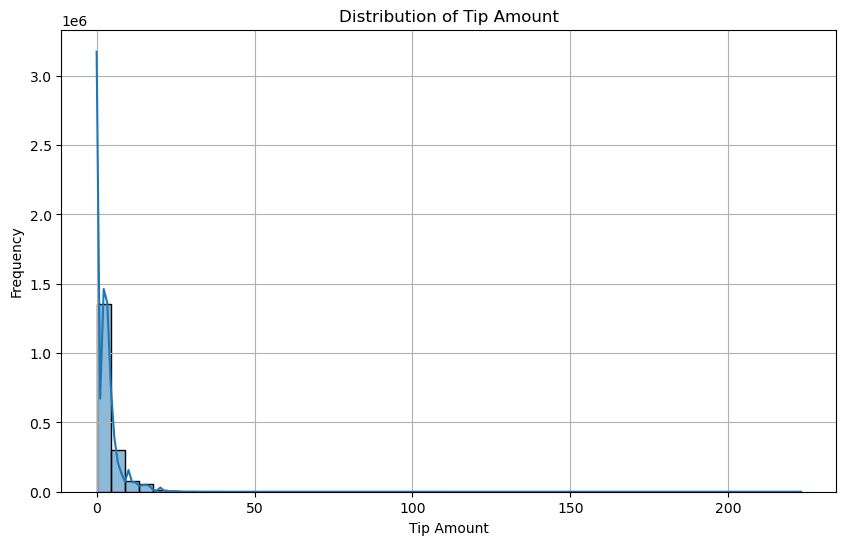

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_amount'], bins=50, kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [70]:
# Adding a field, tip_amount to fare_amount ratio

In [71]:
df.loc[:, 'tip_fare_ratio'] = df['tip_amount']/df['fare_amount']

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_fare_ratio'], bins=50, kde=True)
plt.title('Distribution of Ration of Tip Amount to Fare Amount')
plt.xlabel('Tip Amount to Fare Amount Ration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [73]:
## Removing trips where trip_amount is more than fare_amount 

In [74]:
df = df[df['tip_fare_ratio']<=1 ]


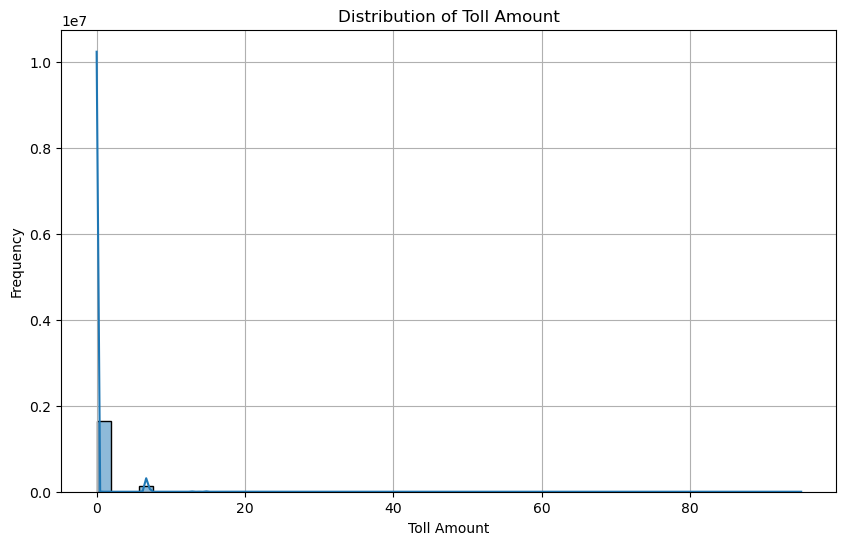

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tolls_amount'], bins=50, kde=True)
plt.title('Distribution of Toll Amount')
plt.xlabel('Toll Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [76]:
# Adding a field, tolls_amount to fare_amount ratio

In [77]:
df.loc[:, 'toll_fare_ratio'] = df['tolls_amount']/df['fare_amount']

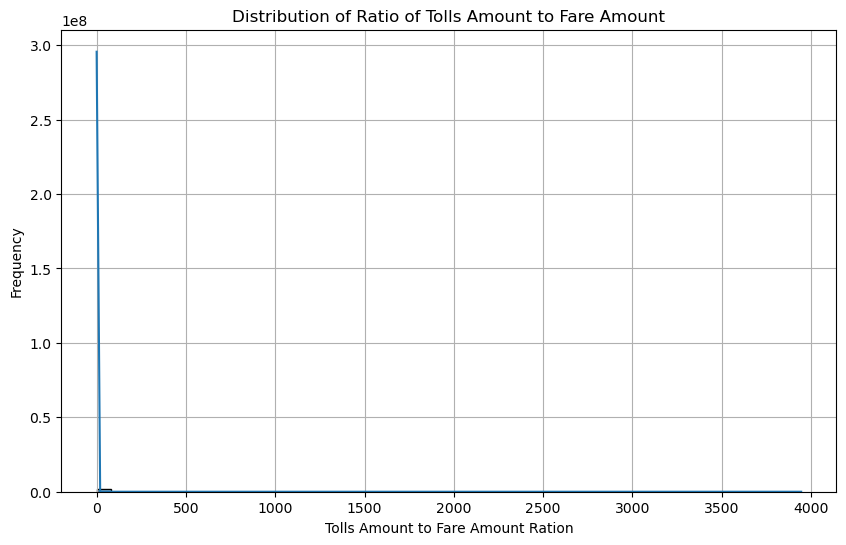

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df['toll_fare_ratio'], bins=50, kde=True)
plt.title('Distribution of Ratio of Tolls Amount to Fare Amount')
plt.xlabel('Tolls Amount to Fare Amount Ration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [79]:
## Removing trips where tolls_amount is more than fare_amount 

In [80]:
df= df[df['toll_fare_ratio']<=1 ]

In [81]:
## Analyzing Total Amount

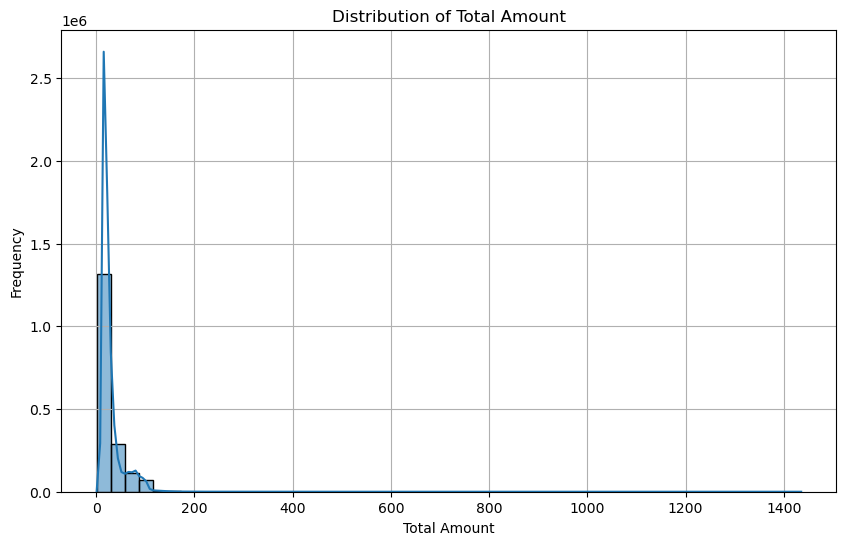

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [83]:
## Analyzing Airport Fee 

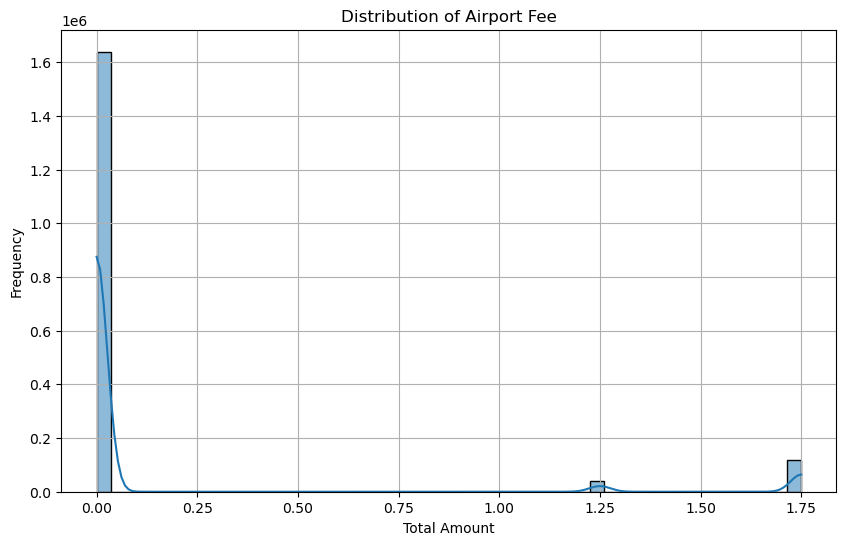

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['airport_fee_updated'], bins=50, kde=True)
plt.title('Distribution of Airport Fee')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [85]:
df['airport_fee_updated'].value_counts()

airport_fee_updated
0.00    1639662
1.75     119725
1.25      39323
1.00          1
Name: count, dtype: int64

In [86]:
# Since Airport fee is fixed at 1.25, we will replace non zero values with 1.25
df.loc[:,'airport_fee_updated'] = df['airport_fee_updated'].apply(lambda x : 1.25 if x>0 else x )

In [87]:
# It has two distinct values, 0 and 2.5 respectively, this looks good
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1660986
0.0     137724
0.5          1
Name: count, dtype: int64

In [88]:
df.shape

(1798711, 23)

In [89]:
# Recalculating the total amount by summing the various components
df['total_amount_updated'] = (df['fare_amount'].fillna(0) + 
                                df['extra'].fillna(0) + 
                                df['tip_amount'].fillna(0) + 
                                df['tolls_amount'].fillna(0) + 
                                df['improvement_surcharge'].fillna(0) + 
                                df['mta_tax'].fillna(0) +
                                df['congestion_surcharge'].fillna(0) + 
                                df['airport_fee_updated'].fillna(0))

In [90]:
# Now dropping the total amount and then renaming total_amount_updated to total amount
df.drop('total_amount', axis=1, inplace=True)
df = df.rename(columns={'total_amount_updated': 'total_amount'})

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [91]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'congestion_surcharge',
 'pickup_hour',
 'trip_duration',
 'airport_fee_updated',
 'tip_fare_ratio',
 'toll_fare_ratio',
 'total_amount']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

### Variable Categorization

#### Categorical Variables:
- **VendorID**: Categorical (typically codes like 1 or 2 for different vendors)  
- **RatecodeID**: Categorical (codes representing rate types)  
- **PULocationID**: Categorical (pickup location ID)  
- **DOLocationID**: Categorical (drop-off location ID)  
- **payment_type**: Categorical (e.g., 1 = Credit Card, 2 = Cash, etc.)  

#### Numerical Variables:
- **passenger_count**: Numerical (number of passengers, integer)  
- **trip_distance**: Numerical (measured in miles or kilometers, float)  
- **pickup_hour**: Numerical (hour of the day, 0–23)  
- **trip_duration**: Numerical (typically in seconds or minutes)  

#### Datetime Variables (can be transformed):
- **tpep_pickup_datetime**: Datetime (can be split into date, time, hour, etc.)  
- **tpep_dropoff_datetime**: Datetime (same as above)  


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [92]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1               2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
2               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
4               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
6               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1896396         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1896397         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1896399         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.31         1.0                  N           163   
1                 1.22         1.0                  N           161   
2                 3.99         1.0                  N           148   
4                 1.05         1.0                  N           161   
6                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896395           2.63         1.0                  N           170   
1896396           0.00        99.0                  N            90   
1896397           5.40         1.0                  N            87   
1896398           1.00         1.0                  N            87   
1896399           5.04         1.0                  N           209   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 162             1         10.0    1.0      0.5        3.00   
1                 229             1          9.3    1.0      0.5        1.43   
2                  50             1         23.3    1.0      0.5        5.66   
4                 161             1         10.7    1.0      0.5        3.14   
6                  68             1          5.1    1.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896395           143             1         14.2    1.0      0.5        4.80   
1896396           232             1         18.2    0.0      0.5        0.00   
1896397           161             1         32.4    3.5      0.5        2.00   
1896398           231             2         10.7    3.5      0.5        0.00   
1896399           225             1         25.4    1.0      0.5        4.56   

         tolls_amount  improvement_surcharge  congestion_surcharge  \
0                 0.0                    0.3                   2.5   
1                 0.0                    0.3                   2.5   
2                 0.0                    0.3                   2.5   
4                 0.0                    0.3                   2.5   
6                 0.0                    0.3                   2.5   
...               ...                    ...                   ...   
1896395           0.0                    0.3                   2.5   
1896396           0.0                    0.3                   0.0   
1896397           0.0                    0.3                   2.5   
1896398           0.0                    0.3                   2.5   
1896399           0.0                    0.3                   2.5   

         pickup_hour  trip_duration  airport_fee_updated  tip_fare_ratio  \
0                 23       8.766667                  0.0        0.300000   
1                 23       7.950000                  0.0        0.153763   
2                  0      22.350000                  0.0        0.242918   
4                  0      10.633333                  0.0        0.293458   
6

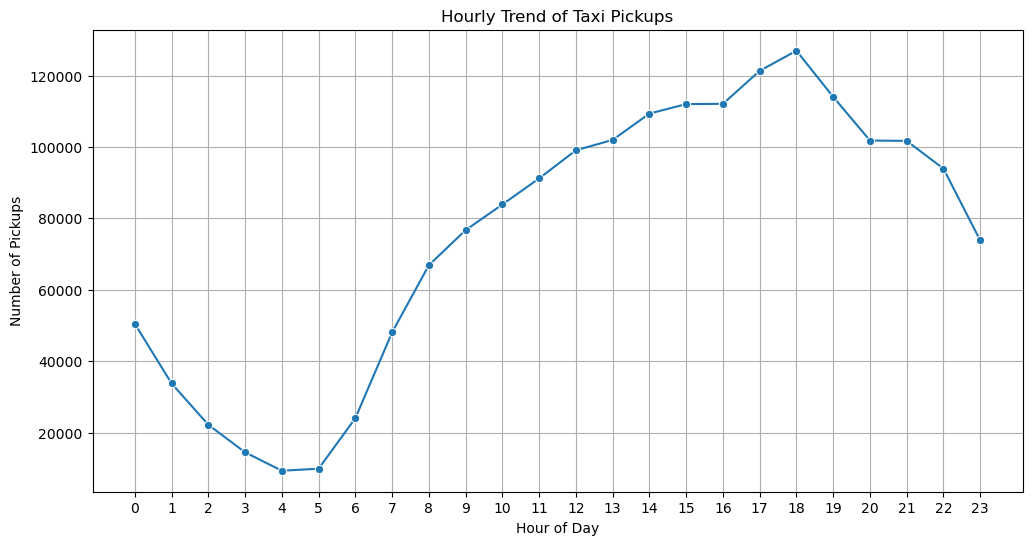

In [93]:
# Find and show the hourly trends in taxi pickups

# Count pickups per hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [94]:
# Taxi pickups are lowest around 4–5 AM and rise sharply after 6 AM, peaking between 6–8 PM.
# Activity declines gradually after 9 PM, showing strong commuter and evening demand patterns.

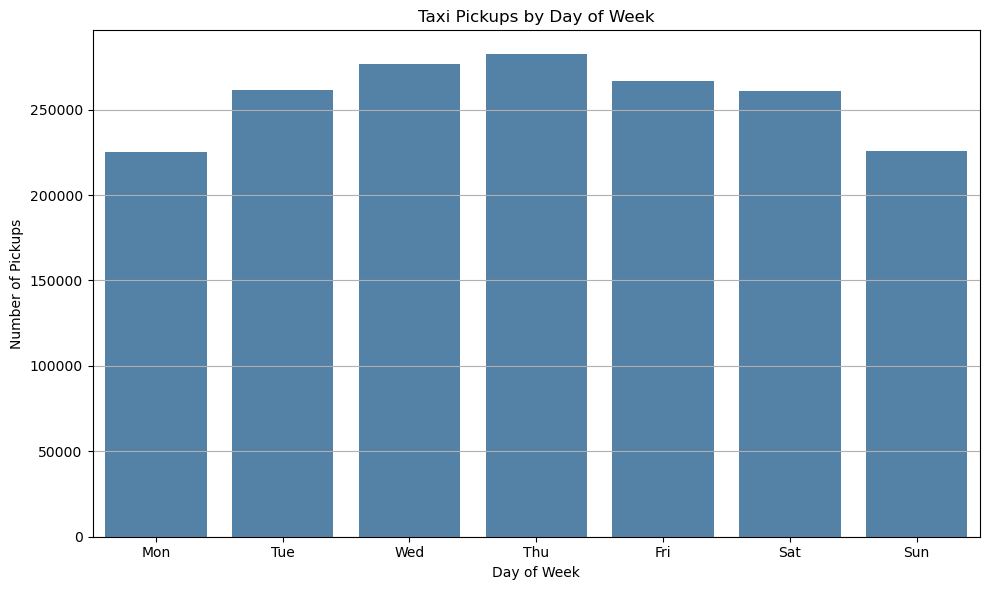

In [95]:
# Find and show the daily trends in taxi pickups (days of the week)


# Extract day of week

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['day_of_week'].map(day_name_map)

# Group by day and count
pickup_counts = df['day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot with single blue color
plt.figure(figsize=(10, 6))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, color='steelblue')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [96]:
# Yellow taxi pickups peak midweek, especially on Thursdays, 
# and are lowest on Sundays and Mondays—indicating higher demand on weekdays, likely due to commuting and business travel.

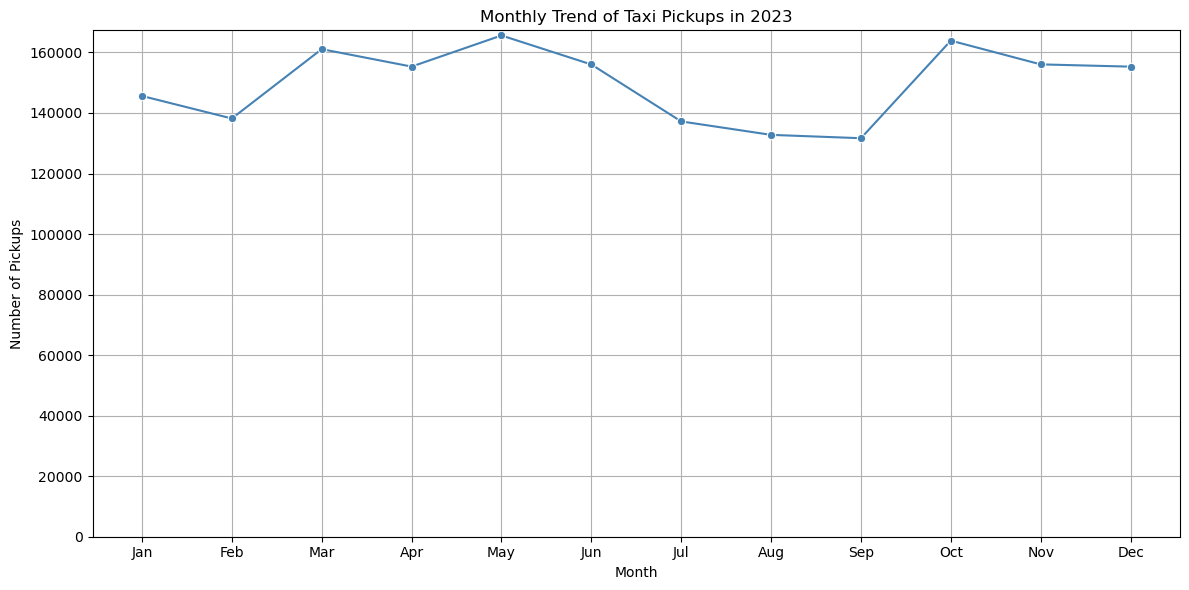

In [97]:
# Show the monthly trends in pickups

df['month'] = df['tpep_pickup_datetime'].dt.month
month_name_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['month_name'] = df['month'].map(month_name_map)

# Count pickups per month
monthly_counts = df['month_name'].value_counts().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='steelblue')
plt.title('Monthly Trend of Taxi Pickups in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.ylim(bottom=0)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# Yellow taxi pickups in 2023 peaked in May and October, while August and September saw the lowest activity

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [99]:
# Analyse the above parameters

# Check for zero or negative values in specified columns
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} - zeros: {zero_count}, negatives: {negative_count}")


fare_amount - zeros: 0, negatives: 0
tip_amount - zeros: 401755, negatives: 0
total_amount - zeros: 0, negatives: 0
trip_distance - zeros: 21259, negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [100]:
# Yes, creating a copy of the DataFrame that excludes zero (and possibly negative) values from these 
# financial and distance columns can be very beneficial for our analysis

In [101]:
df_new = df.copy()

In [102]:
df_new.shape

(1798711, 27)

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [103]:
## If pickup and drop is in same zone, distance can be zero, thence, we will not remove such trips

In [104]:
df_new= df_new[
    (df_new['fare_amount'] > 0) &
    (df_new['tip_amount'] >= 0) &
    (df_new['total_amount'] > 0) &
    (
        (df_new['trip_distance'] > 0) | 
        ((df_new['trip_distance'] == 0) & (df_new['PULocationID'] == df_new['DOLocationID']))
    )
]

In [105]:
df_new.shape

(1791233, 27)

In [106]:
## Removed almost 7500 trips by applying above conditions

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

   month_name  total_amount
0         Jan    3950408.38
1         Feb    3734772.44
2         Mar    4502756.55
3         Apr    4421097.02
4         May    4808834.47
5         Jun    4530341.61
6         Jul    3942462.63
7         Aug    3836233.25
8         Sep    3917566.26
9         Oct    4830547.55
10        Nov    4501688.71
11        Dec    4484916.03


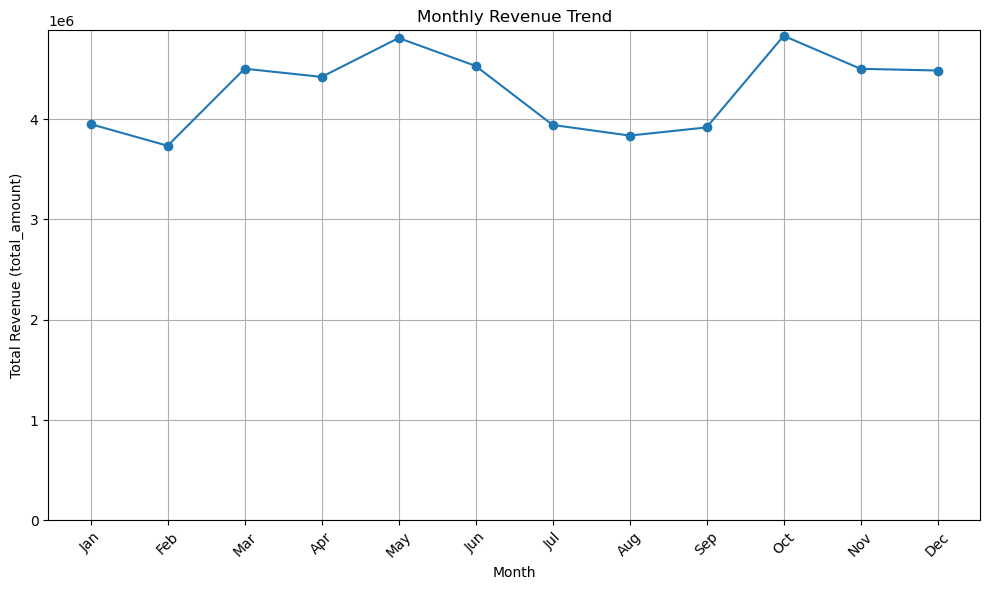

In [107]:



# Group by month and month_name, sum total_amount
monthly_revenue = df_new.groupby(['month', 'month_name'])['total_amount'].sum().reset_index()

# Sort by month to get chronological order
monthly_revenue = monthly_revenue.sort_values('month')

# Print the revenue by month
print(monthly_revenue[['month_name', 'total_amount']])

# Plot the monthly revenue trend
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['month_name'], monthly_revenue['total_amount'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (total_amount)')
plt.ylim(bottom=0)  
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# The monthly revenue trend shows fluctuations throughout the year, with peaks in May and October
# reaching close to 5 million in total revenue. The lowest revenue occurs around February and August.
# Overall, the pattern suggests seasonality with mid-year and fall months generating higher taxi trip revenues


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [109]:
# Calculate proportion of each quarter

# Define a function to assign quarter based on month
def get_quarter(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    elif 10 <= month <= 12:
        return 'Q4'

# Add quarter column to DataFrame
df_new['quarter'] = df_new['month'].apply(get_quarter)

# Group by quarter and sum total_amount
revenue_by_quarter = df_new.groupby('quarter')['total_amount'].sum()

# Compute proportions
revenue_proportion = revenue_by_quarter / revenue_by_quarter.sum()

# Reorder quarters
revenue_proportion = revenue_proportion.reindex(['Q1', 'Q2', 'Q3', 'Q4'])

# Display the result
print(revenue_proportion)


quarter
Q1    0.236835
Q2    0.267389
Q3    0.227281
Q4    0.268494
Name: total_amount, dtype: float64


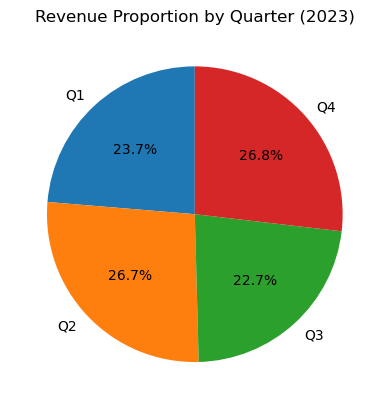

In [110]:
revenue_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Revenue Proportion by Quarter (2023)')
plt.ylabel('')  # Hide y-label
plt.show()

In [111]:
# The pie chart illustrates the proportion of NYC yellow taxi revenue by quarter for 2023. 
# Q4 contributed the highest at 26.8%, followed closely by Q2 at 26.7%. Q1 accounted for 23.7%,
# while Q3 had the lowest share at 22.7%, indicating relatively consistent revenue across quarters.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

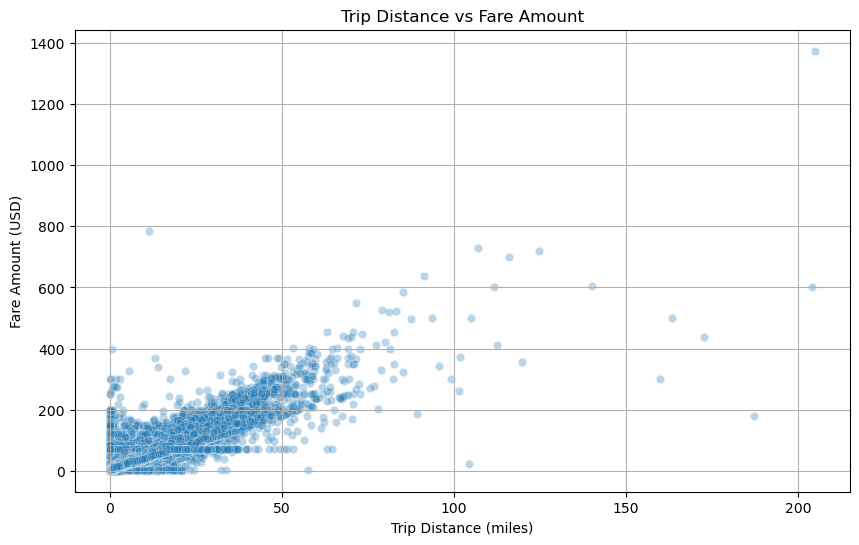

In [112]:
# Show how trip fare is affected by distance

# Filter out trips with 0 distance
df_filtered = df_new[df_new['trip_distance'] > 0]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()


In [113]:
# Calculate correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f'Correlation between trip_distance and fare_amount: {correlation:.4f}')

Correlation between trip_distance and fare_amount: 0.9444


In [114]:
# The correlation between trip distance and fare amount is 0.9444,
# indicating a strong positive linear relationship.
# As the distance increases, the fare tends to rise proportionally,
# which aligns with the expected fare structure of NYC yellow taxis.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

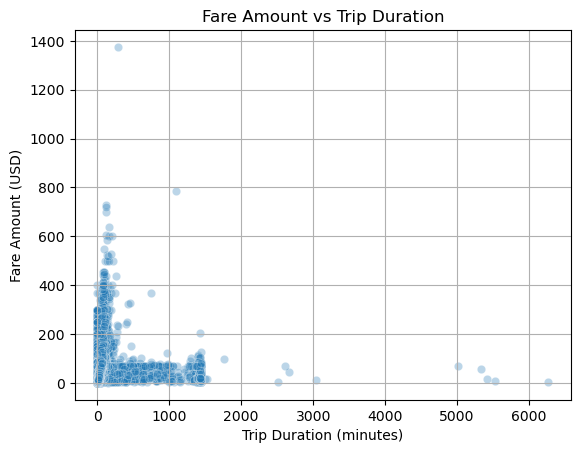

Correlation between fare_amount and trip_duration: 0.2641


In [115]:
# Show relationship between fare and trip duration

sns.scatterplot(data=df_new, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

# Correlation
corr_duration = df_new['fare_amount'].corr(df_new['trip_duration'])
print(f'Correlation between fare_amount and trip_duration: {corr_duration:.4f}')

In [116]:
# Show relationship between fare and number of passengers

# Scatter plot with jitter
sns.stripplot(data=df_new, x='passenger_count', y='fare_amount', jitter=True, alpha=0.3)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

# Correlation
corr_passenger = df_new['fare_amount'].corr(df_new['passenger_count'])
print(f'Correlation between fare_amount and passenger_count: {corr_passenger:.4f}')


Correlation between fare_amount and passenger_count: 0.0440


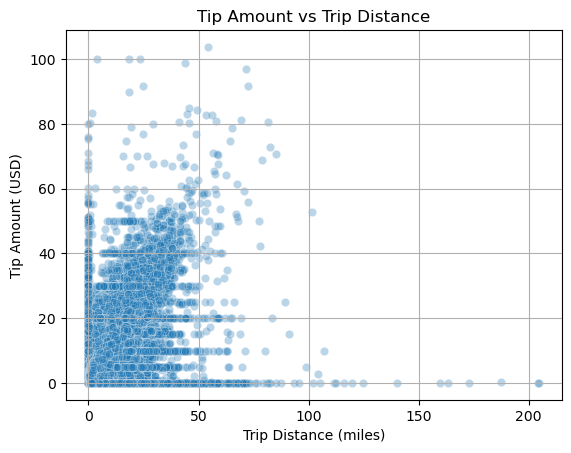

Correlation between tip_amount and trip_distance: 0.5961


In [117]:
# Show relationship between tip and trip distance

# Scatter plot
sns.scatterplot(data=df_new, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(True)
plt.show()

# Correlation
corr_tip = df_new['tip_amount'].corr(df_new['trip_distance'])
print(f'Correlation between tip_amount and trip_distance: {corr_tip:.4f}')

In [118]:
# Fare amount shows a weak positive correlation with trip duration (0.2641) and a very weak correlation
# with passenger count (0.0440). Tip amount has a moderate positive correlation with trip distance (0.5961), 
# indicating that longer trips tend to receive higher tips.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [119]:
# Analyse the distribution of different payment types (payment_type).



# Define a mapping for better readability
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}

# Apply mapping to create a readable column
df_new['payment_label'] = df_new['payment_type'].map(payment_mapping)

# Count plot
plt.figure(figsize=(8, 5))

sns.countplot(data=df_new, x='payment_label', hue='payment_label',
              order=['Credit Card', 'Cash', 'No Charge', 'Dispute'],
              palette='pastel', legend=False)

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()

# Value counts (numerical summary)
payment_counts = df_new['payment_label'].value_counts(normalize=True) * 100
print(payment_counts.round(2))



payment_label
Credit Card    81.57
Cash           17.25
Dispute         0.74
No Charge       0.44
Name: proportion, dtype: float64


In [120]:
# The majority of trips were paid by credit card (81.57%), followed by cash (17.25%).
# Disputed payments and no-charge trips were rare, accounting for less than 1.2% combined.

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [121]:
#pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [122]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/sangeetchoubey/a) Upgrad/b) SQL & Statitistics Essentials/c) EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

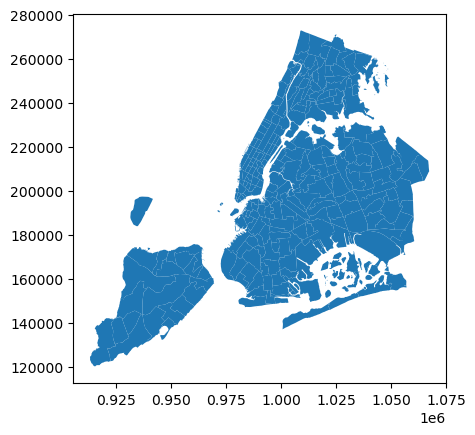

In [123]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [124]:
# Merge zones and trip records using locationID and PULocationID

df_merge_pu = pd.merge(df_new, zones, left_on = 'PULocationID', right_on = 'LocationID', how = 'inner')
df_merge_pu.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1         2  2023-12-01 00:41:13   2023-12-01 00:48:50              2.0   
2         1  2023-12-01 00:49:44   2023-12-01 01:02:43              1.0   
3         2  2023-12-01 00:34:39   2023-12-01 00:40:12              1.0   
4         2  2023-12-01 01:13:52   2023-12-01 01:21:47              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.31         1.0                  N           163           162   
1           1.78         1.0                  N           163            50   
2           1.70         1.0                  N           163           170   
3           0.98         1.0                  N           163           237   
4           1.39         1.0                  N           163           237   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.0    1.0      0.5        3.00           0.0   
1             1         10.7    1.0      0.5        1.60           0.0   
2             2         12.1    3.5      0.5        0.00           0.0   
3             1          7.2    1.0      0.5        2.44           0.0   
4             1         10.0    1.0      0.5        3.00           0.0   

   improvement_surcharge  congestion_surcharge  pickup_hour  trip_duration  \
0                    0.3                   2.5           23       8.766667   
1                    0.3                   2.5            0       7.616667   
2                    0.3                   2.5            0      12.983333   
3                    0.3                   2.5            0       5.550000   
4                    0.3                   2.5            1       7.916667   

   airport_fee_updated  tip_fare_ratio  toll_fare_ratio  total_amount  \
0                  0.0        0.300000              0.0         17.30   
1                  0.0        0.149533              0.0         16.60   
2                  0.0        0.000000              0.0         18.90   
3                  0.0        0.338889              0.0         13.94   
4                  0.0        0.300000              0.0         17.30   

   day_of_week day_name  month month_name quarter payment_label  OBJECTID  \
0            3      Thu     11        Nov      Q4   Credit Card       163   
1            4      Fri     12        Dec      Q4   Credit Card       163   
2            4      Fri     12        Dec      Q4          Cash       163   
3            4      Fri     12        Dec      Q4   Credit Card       163   
4            4      Fri     12        Dec      Q4   Credit Card       163   

   Shape_Leng  Shape_Area           zone  LocationID    borough  \
0    0.034177    0.000041  Midtown North         163  Manhattan   
1    0.034177    0.000041  Midtown North         163  Manhattan   
2    0.034177    0.000041  Midtown North         163  Manhattan   
3    0.034177    0.000041  Midtown North         163  Manhattan   
4    0.034177    0.000041  Midtown North         163  Manhattan   

                                            geometry  
0  POLYGON ((9.89e+05 2.19e+05, 9.9e+05 2.19e+05,...  
1  POLYGON ((9.89e+05 2.19e+05, 9.9e+05 2.19e+05,...  
2  POLYGON ((9.89e+05 2.19e+05, 9.9e+05 2.19e+05,...  
3  POLYGON ((9.89e+05 2.19e+05, 9.9e+05 2.19e+05,...  
4  POLYGON ((9.89e+05 2.19e+05, 9.9e+05 2.19e+05,...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [125]:
# Group data by location and calculate the number of trips

trip_counts = df_merge_pu.groupby(['PULocationID', 'zone']).size().reset_index(name='total_trips').\
              sort_values(by='total_trips', ascending=False)
trip_counts = trip_counts.reset_index(drop=True)
trip_counts

PULocationID                    zone  total_trips
0             132             JFK Airport        95348
1             237   Upper East Side South        85148
2             161          Midtown Center        84185
3             236   Upper East Side North        75820
4             162            Midtown East        64343
..            ...                     ...          ...
249           221               Stapleton            1
250           115     Grymes Hill/Clifton            1
251           111     Green-Wood Cemetery            1
252           172  New Dorp/Midland Beach            1
253           109             Great Kills            1

[254 rows x 3 columns]

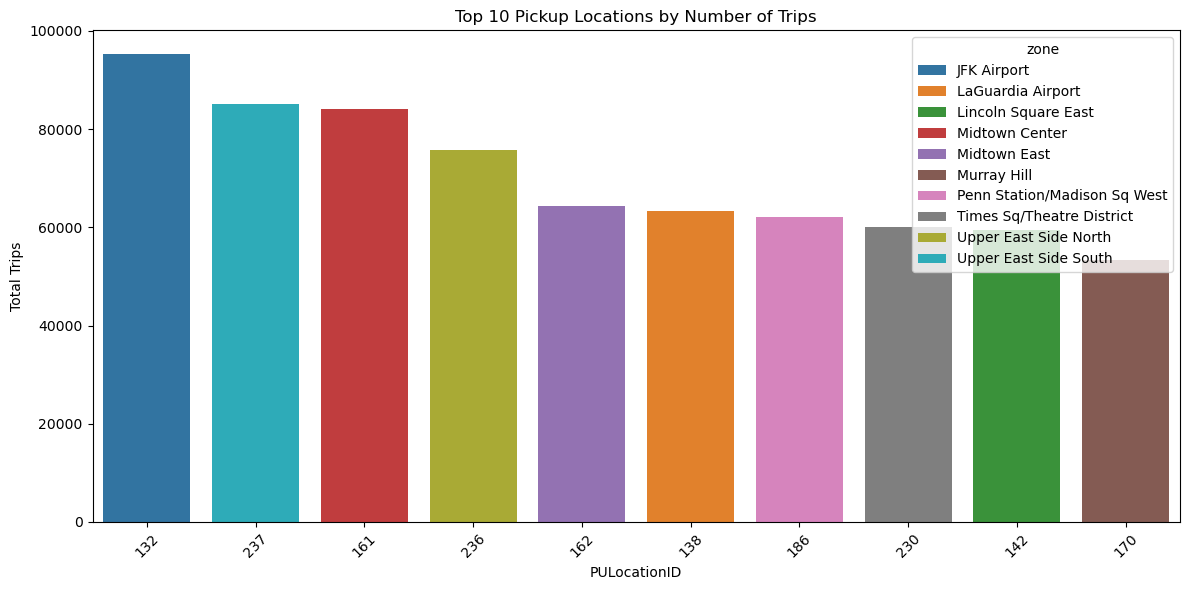

In [126]:
# Sort top_10 by total_trips descending
top_10 = trip_counts[0:10].sort_values(by='total_trips', ascending=False)

# Create bar plot with explicit order
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10,
    x='PULocationID',
    y='total_trips',
    hue='zone',
    order=top_10['PULocationID']
)

plt.title('Top 10 Pickup Locations by Number of Trips')
plt.xlabel('PULocationID')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [127]:
# Merge trip counts back to the zones GeoDataFrame


zones_pu_count = pd.merge(zones, trip_counts[['PULocationID','total_trips']], left_on = 'LocationID', right_on = 'PULocationID',\
                          how = 'inner')
zones_pu_count.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...   
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....   
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...   
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...   
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...   

   PULocationID  total_trips  
0             1          190  
1             2            2  
2             3           34  
3             4         1800  
4             5           10

In [128]:
# can you try displaying the zones DF sorted by the number of trips?
zones_pu_count.sort_values(by='total_trips',ascending=False)


OBJECTID  Shape_Leng  Shape_Area                    zone  LocationID  \
125       132    0.245479    0.002038             JFK Airport         132   
229       237    0.042213    0.000096   Upper East Side South         237   
154       161    0.035804    0.000072          Midtown Center         161   
228       236    0.044252    0.000103   Upper East Side North         236   
155       162    0.035270    0.000048            Midtown East         162   
..        ...         ...         ...                     ...         ...   
213       221    0.166218    0.000890               Stapleton         221   
108       115    0.116169    0.000373     Grymes Hill/Clifton         115   
104       111    0.059931    0.000209     Green-Wood Cemetery         111   
165       172    0.118476    0.000658  New Dorp/Midland Beach         172   
103       109    0.178268    0.001170             Great Kills         109   

           borough                                           geometry  \
125         Queens  MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....   
229      Manhattan  POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...   
154      Manhattan  POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...   
228      Manhattan  POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...   
155      Manhattan  POLYGON ((9.92e+05 2.14e+05, 9.92e+05 2.14e+05...   
..             ...                                                ...   
213  Staten Island  POLYGON ((9.63e+05 1.72e+05, 9.63e+05 1.72e+05...   
108  Staten Island  POLYGON ((9.62e+05 1.68e+05, 9.62e+05 1.68e+05...   
104       Brooklyn  POLYGON ((9.86e+05 1.8e+05, 9.86e+05 1.79e+05,...   
165  Staten Island  POLYGON ((9.6e+05 1.47e+05, 9.6e+05 1.47e+05, ...   
103  Staten Island  POLYGON ((9.43e+05 1.47e+05, 9.43e+05 1.47e+05...   

     PULocationID  total_trips  
125           132        95348  
229           237        85148  
154           161        84185  
228           236        75820  
155           162        64343  
..            ...          ...  
213           221            1  
108           115            1  
104           111            1  
165           172            1  
103           109            1  

[255 rows x 9 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [129]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 7))


# Plot the map and display it

# Plot choropleth map by 'total_trips'
zones_pu_count.plot(
    column='total_trips',        # the data column to color by
    cmap='OrRd',                 # colormap (e.g., OrRd, Viridis, Plasma)
    linewidth=0.8,               # border line width
    edgecolor='black',           # border color
    legend=True,                 # show color scale
    ax=ax                        # plot on the defined axis
)

# Set plot title and remove axes
ax.set_title('Number of Trips by Pickup Zone', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


**Busiest hours, days and months**  
* Taxi pickups are lowest between 4–5 AM, then rise sharply after 6 AM, peaking during evening hours (6–8 PM). This indicates strong commuter and post-work travel activity, with demand tapering off gradually after 9 PM.  
* Pickups peak midweek, especially on Thursdays, and are lowest on Sundays and Mondays. This reflects a weekday-oriented usage pattern, likely driven by commuting and business-related travel.  
* Yellow taxi demand was highest in May and October, while August and September recorded the lowest activity. This may be influenced by seasonal factors such as tourism and holiday schedules.

**Trends in revenue collected**  
* Monthly revenue shows fluctuations throughout the year, with noticeable peaks in May and October, where revenue approaches $5 million. The lowest revenue is observed around February and August, indicating a seasonal trend with higher revenues during mid-year and fall months.  
* In terms of quarterly distribution, Q4 contributed the highest share (26.8%), followed closely by Q2 (26.7%). Q1 accounted for 23.7%, while Q3 had the lowest share (22.7%). This suggests a relatively consistent revenue distribution across quarters, with slightly stronger performance in spring and fall.

**Relationship between fare and trip characteristics**  
* There is a strong positive correlation (0.9444) between trip distance and fare amount, indicating that fares increase proportionally with distance, as expected from NYC taxi fare rules.  
* Trip duration has a weak positive correlation (0.2641) with fare. While longer durations may slightly increase fares, the relationship is not as strong as with distance.  
* Passenger count shows a very weak correlation (0.0440) with fare amount, suggesting that the number of passengers has minimal impact on the fare.

**Tip amount and trip distance**  
* Tip amount has a moderate positive correlation (0.5961) with trip distance, indicating that longer trips tend to receive higher tips. This may be due to higher fare totals or more time spent with the driver during longer rides.

**Busiest zones**

*Based on the number of trips, the top 5 busiest zones are:*

- JFK Airport: ~95,000 trips  
- LaGuardia Airport: ~87,000 trips  
- Midtown Center: ~85,000 trips  
- Upper East Side North: ~75,000 trips  
- Midtown East: ~66,000 trips  

These zones have the highest number of pickups, indicating their popularity and proximity to major transport hubs, business districts, and residential areas.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [130]:
df_merge= pd.merge(df_merge_pu, zones, left_on = 'DOLocationID', right_on = 'LocationID', how = 'inner')

In [131]:
df_merge= df_merge[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 
                    'RatecodeID','store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
                    'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','congestion_surcharge',
                    'pickup_hour', 'trip_duration', 'airport_fee_updated', 'total_amount', 'day_of_week', 'day_name',
                    'month','month_name', 'quarter','payment_label','zone_x','zone_y']]

In [132]:
df_merge.rename(columns= {'zone_x':'pickup_zone','zone_y':'dropoff_zone' },inplace=True)
df_merge

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1               2  2023-12-01 12:43:32   2023-12-01 12:50:05              1.0   
2               2  2023-12-01 14:43:52   2023-12-01 15:08:04              5.0   
3               2  2023-12-01 16:38:17   2023-12-01 16:51:10              1.0   
4               2  2023-12-01 19:03:03   2023-12-01 19:14:37              1.0   
...           ...                  ...                   ...              ...   
1763223         2  2023-02-24 10:01:33   2023-02-24 10:02:13              1.0   
1763224         2  2023-09-27 20:41:29   2023-09-27 20:41:36              4.0   
1763225         1  2023-10-17 11:01:12   2023-10-17 11:19:22              1.0   
1763226         2  2023-08-07 16:54:07   2023-08-07 17:20:25              1.0   
1763227         2  2023-03-09 12:59:12   2023-03-09 13:29:32              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.31         1.0                  N           163   
1                 0.87         1.0                  N           163   
2                 1.12         1.0                  N           163   
3                 0.42         1.0                  N           163   
4                 0.91         1.0                  N           163   
...                ...         ...                ...           ...   
1763223           0.59         1.0                  N            44   
1763224           0.00         5.0                  N           204   
1763225           7.10         1.0                  N           132   
1763226           9.20         1.0                  N           132   
1763227          13.31         1.0                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 162             1         10.0   1.00      0.5        3.00   
1                 162             1          7.9   0.00      0.5        2.00   
2                 162             1         17.7   0.00      0.5        0.00   
3                 162             1         11.4   2.50      0.5        3.58   
4                 162             1         10.7   2.50      0.5        3.44   
...               ...           ...          ...    ...      ...         ...   
1763223           204             2          4.4   0.00      0.5        0.00   
1763224           204             1         20.0   0.00      0.0        0.00   
1763225             2             2         29.6   1.75      0.5        0.00   
1763226             2             2         38.7   2.50      0.5        0.00   
1763227             2             2         53.4   0.00      0.5        0.00   

         tolls_amount  improvement_surcharge  congestion_surcharge  \
0                0.00                    0.3                   2.5   
1                0.00                    0.3                   2.5   
2                0.00                    0.3                   2.5   
3                0.00                    0.3                   2.5   
4                0.00                    0.3                   2.5   
...               ...                    ...                   ...   
1763223          0.00                    0.3                   0.0   
1763224          0.00                    0.3                   0.0   
1763225          0.00                    0.3                   0.0   
1763226          0.00                    0.3                   0.0   
1763227          2.45                    0.3                   0.0   

         pickup_hour  trip_duration  airport_fee_updated  total_amount  \
0                 23       8.766667                 0.00         17.30   
1                 12       6.550000                 0.00         13.20   
2                 14      24.200000                 0.00         21.00   
3                 16      12.883333                 0.00         20.78   
4          

In [133]:
df_merge.loc[:,'speed'] = df_merge['trip_distance']*60/df_merge['trip_duration']

In [134]:
## Considering min speed of 1 mile per hour and max speed of 120 miles per hour (that is highest in US)
df_speed= df_merge[(df_merge.speed>=1) & (df_merge.speed<=120) ]

In [135]:
# Group by the columns and sum distance and duration
grouped = df_speed.groupby(['pickup_hour', 'pickup_zone', 'dropoff_zone']).agg({
    'trip_distance': 'sum',
    'trip_duration': 'sum'  
}).reset_index()

# Convert trip_duration from minutes to hours
grouped['trip_duration_hours'] = grouped['trip_duration'] / 60

# Calculate average speed (distance / time in hours)
grouped['average_speed (miles/hour)'] = grouped['trip_distance'] / grouped['trip_duration_hours']

# View result
grouped.sort_values(by='average_speed (miles/hour)')

pickup_hour               pickup_zone  \
38710             9              Midtown East   
39595             9                 Sunnyside   
17213             4           Cambria Heights   
50185            11        Morrisania/Melrose   
22821             6               Brownsville   
...             ...                       ...   
3558              0    Mott Haven/Port Morris   
29044             7            Newark Airport   
106243           21                 Flatlands   
86600            17  Washington Heights South   
95258            19               Kew Gardens   

                            dropoff_zone  trip_distance  trip_duration  \
38710   East Concourse/Concourse Village           0.90      53.950000   
39595                        JFK Airport          14.81     880.266667   
17213      Long Island City/Queens Plaza           0.50      29.600000   
50185                      Melrose South           0.40      23.333333   
22821                      East New York           1.20      69.200000   
...                                  ...            ...            ...   
3558              Mott Haven/Port Morris           0.16       0.116667   
29044                     Newark Airport           0.60       0.383333   
106243                         Flatlands           0.21       0.133333   
86600                         Highbridge          10.80       6.766667   
95258                   South Ozone Park           4.66       2.616667   

        trip_duration_hours  average_speed (miles/hour)  
38710              0.899167                    1.000927  
39595             14.671111                    1.009467  
17213              0.493333                    1.013514  
50185              0.388889                    1.028571  
22821              1.153333                    1.040462  
...                     ...                         ...  
3558               0.001944                   82.285714  
29044              0.006389                   93.913043  
106243             0.002222                   94.500000  
86600              0.112778                   95.763547  
95258              0.043611                  106.853503  

[122822 rows x 7 columns]

In [136]:
# Find routes which have the slowest speeds at different times of the day

## Routes from Midtown East to East Concourse/Concourse Village, Sunnyside to JFK Airport and Cambria Heights 
## to Long Island City/Queens Plaza are top three slowest routes at different times of day.



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

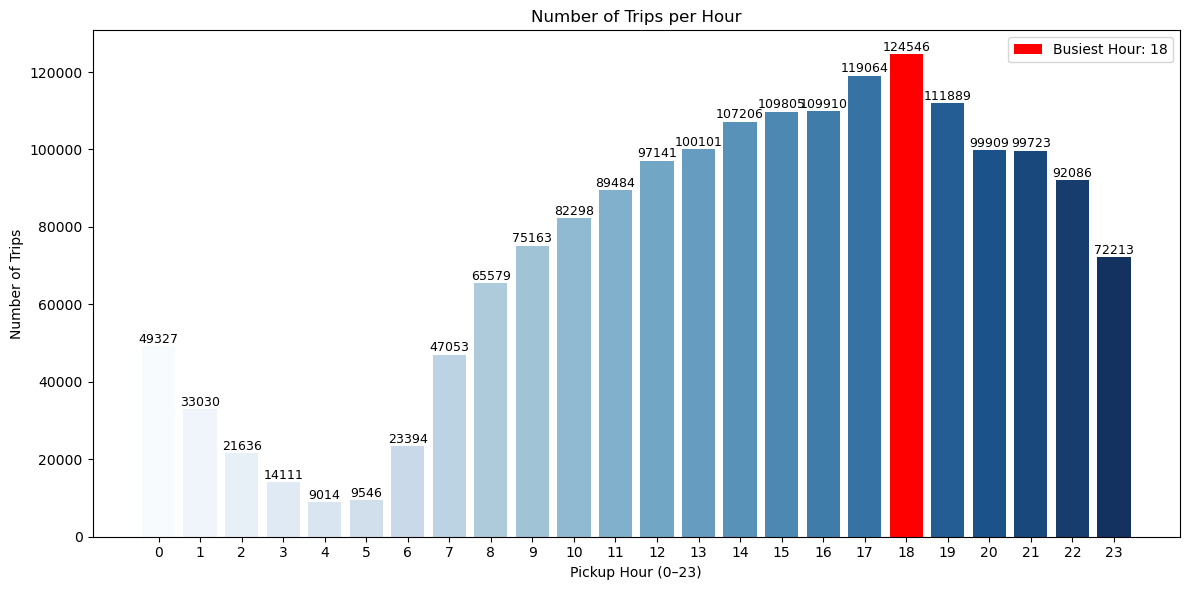

In [137]:
# Count number of trips per hour
hourly_trip_counts = df_merge['pickup_hour'].value_counts().sort_index()

# Convert to DataFrame for seaborn compatibility
hourly_df = pd.DataFrame({
    'pickup_hour': hourly_trip_counts.index,
    'trip_count': hourly_trip_counts.values
})

# Find busiest hour
busiest_hour = hourly_df.loc[hourly_df['trip_count'].idxmax(), 'pickup_hour']
busiest_count = hourly_df['trip_count'].max()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_df, x='pickup_hour', y='trip_count', hue='pickup_hour', palette='Blues', legend=False)

# Annotate each bar
for i, row in hourly_df.iterrows():
    plt.text(i, row['trip_count'] + 50, str(row['trip_count']), ha='center', va='bottom', fontsize=9)

# Highlight busiest hour
plt.bar(busiest_hour, busiest_count, color='red', label=f'Busiest Hour: {busiest_hour}')

plt.title('Number of Trips per Hour')
plt.xlabel('Pickup Hour (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()

In [138]:
# The bar chart shows trip counts by pickup hour (0–23). The busiest hour is 6 PM (18:00) with 125k trips,
# highlighted in red. Trip volume is lowest around 4 AM and rises sharply from 6 AM, peaking in the evening before
# tapering off. A color gradient indicates trip volume,with darker shades for busier hours.

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [139]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = .05

hourly_df.loc[:,'trip_count'] = hourly_df['trip_count']  * (1 / sample_fraction)
hourly_df.sort_values(by='trip_count', ascending=False)

top_5 = hourly_df.sort_values(by='trip_count', ascending=False).head(5)
top_5

pickup_hour  trip_count
18           18     2490920
17           17     2381280
19           19     2237780
16           16     2198200
15           15     2196100

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

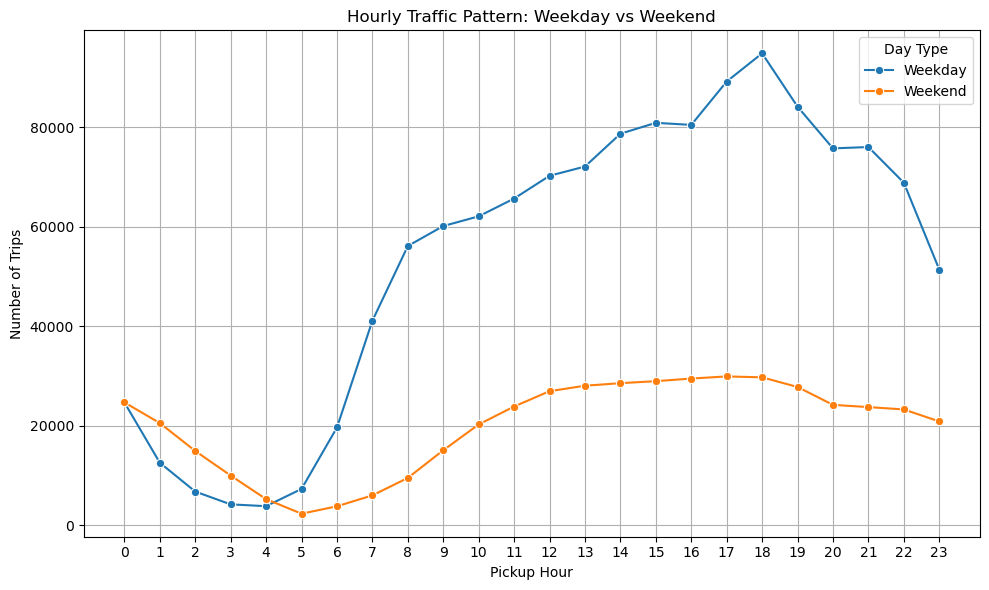

In [140]:
# Compare traffic trends for the week days and weekends

# Create 'day_type' column
df_merge['day_type'] = df_merge['day_name'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')

# Group by pickup_hour and day_type
hourly_summary = df_merge.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_summary, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Traffic Pattern: Weekday vs Weekend')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [141]:
# Weekday traffic peaks during morning (8–10 AM) and evening (5–7 PM) commute hours.
# Weekend traffic is flatter, peaking in the afternoon (1–5 PM).
# Quiet hours: Early morning (1–5 AM) all days

# It can help in planning for less traffic congestion.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [142]:
# calculating dropoff_hour in the data
df_merge['dropoff_hour'] = df_merge['tpep_dropoff_datetime'].dt.hour  


In [143]:
# 1. Group by pickup_hour and PULocationID to get trip counts
pickup_hourly = (
    df_merge.groupby(['pickup_hour', 'PULocationID','pickup_zone'])
    .size()
    .reset_index(name='trip_count')
)

# 2. Sort by trip_count descending
sorted_pickups = pickup_hourly.sort_values(by='trip_count', ascending=False)

# 3. Extract top 10 unique pickup zones (PULocationID)
top10_unique_zones = sorted_pickups.drop_duplicates(subset='PULocationID').head(10)

print(top10_unique_zones)

      pickup_hour  PULocationID                pickup_zone  trip_count
3647           18           161             Midtown Center        7291
3707           18           237      Upper East Side South        6457
3209           16           132                JFK Airport        6414
3085           15           236      Upper East Side North        6343
3648           18           162               Midtown East        5459
4167           21           142        Lincoln Square East        4768
2792           14           138          LaGuardia Airport        4673
3649           18           163              Midtown North        4614
3700           18           230  Times Sq/Theatre District        4342
3655           18           170                Murray Hill        4153


In [144]:
top10_zone_ids = top10_unique_zones['PULocationID'].tolist()

In [145]:
top10_zone_ids

[161, 237, 132, 236, 162, 142, 138, 163, 230, 170]

In [146]:
top10_zone_trends=pickup_hourly [pickup_hourly.PULocationID.isin(top10_zone_ids)]

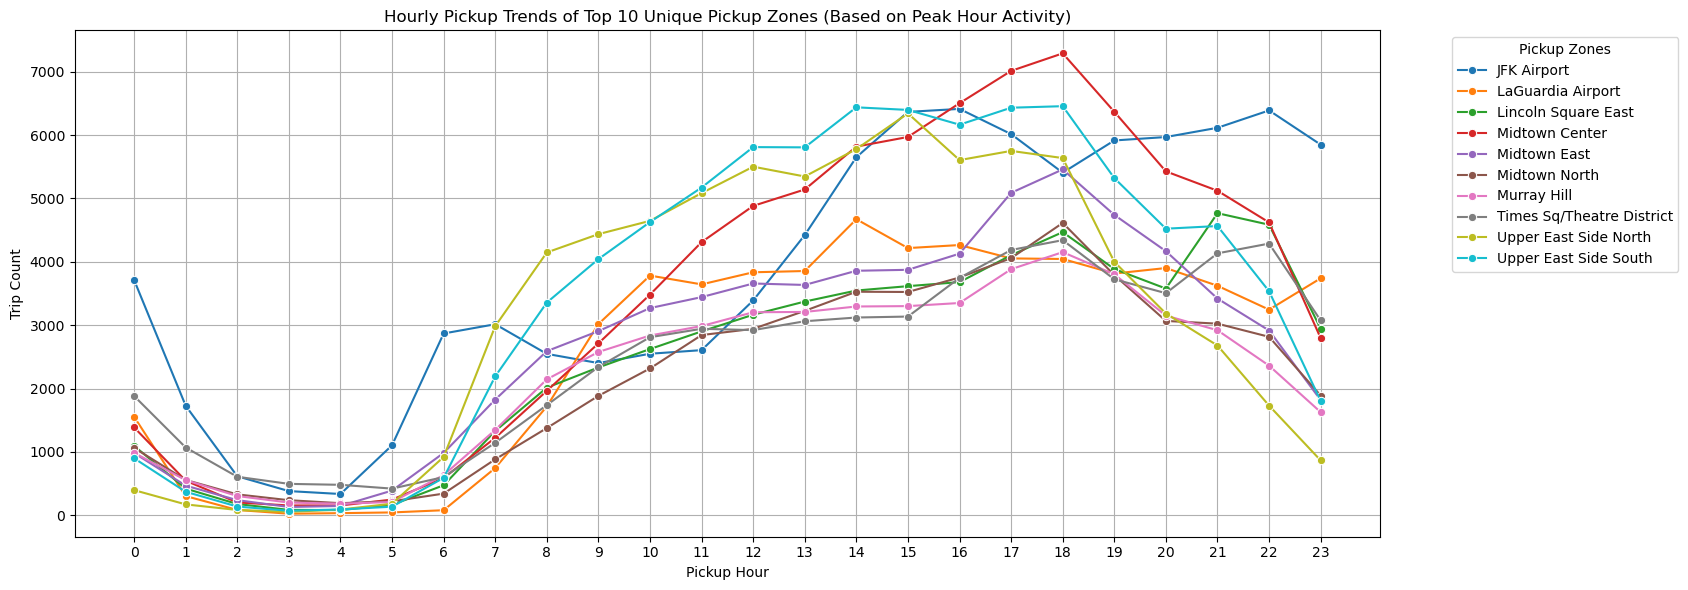

In [147]:
plt.figure(figsize=(14,6))
sns.lineplot(data=top10_zone_trends, x='pickup_hour', y='trip_count', hue='pickup_zone', marker='o')
plt.title('Hourly Pickup Trends of Top 10 Unique Pickup Zones (Based on Peak Hour Activity)')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Count')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Pickup Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [148]:
# This line chart shows hourly trip trends for the top 10 pickup zones, with most areas peaking between 16:00 and 18:00, 
# especially Midtown Center and Upper East Side South.


In [149]:
# 1. Group by pickup_hour and PULocationID to get trip counts
dropoff_hourly = (
    df_merge.groupby(['dropoff_hour', 'DOLocationID','dropoff_zone'])
    .size()
    .reset_index(name='trip_count')
)

# 2. Sort by trip_count descending
sorted_dropoffs = dropoff_hourly.sort_values(by='trip_count', ascending=False)

# 3. Extract top 10 unique pickup zones (PULocationID)
top10_unique_zones = sorted_dropoffs.drop_duplicates(subset='DOLocationID').head(10)

print(top10_unique_zones)

      dropoff_hour  DOLocationID               dropoff_zone  trip_count
4500            18           237      Upper East Side South        6161
3760            15           236      Upper East Side North        6145
2954            12           161             Midtown Center        4930
4493            18           230  Times Sq/Theatre District        4903
4409            18           142        Lincoln Square East        4666
4502            18           239      Upper West Side South        4114
4408            18           141            Lenox Hill West        3673
4437            18           170                Murray Hill        3625
4324            18            48               Clinton East        3617
2232             9           162               Midtown East        3578


In [150]:
top10_zone_ids = top10_unique_zones['DOLocationID'].tolist()

In [151]:
top10_zone_trends=dropoff_hourly [dropoff_hourly.DOLocationID.isin(top10_zone_ids)]

In [152]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=top10_zone_trends, x='dropoff_hour', y='trip_count', hue='dropoff_zone', marker='o')
plt.title('Hourly Dropoff Trends of Top 10 Unique Dropoff Zones (Based on Peak Hour Activity)')
plt.xlabel('Dropoff Hour')
plt.ylabel('Trip Count')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Dropoff Zones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [153]:
# This chart shows hourly drop-off trends for the top 10 zones. 
# Peak activity occurs between 17:00–19:00, especially in Upper East Side South
# and Midtown Center.


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [154]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



# Count pickups per zone
pickup_counts = df_merge['pickup_zone'].value_counts().rename('pickup_count')

# Count dropoffs per zone
dropoff_counts = df_merge['dropoff_zone'].value_counts().rename('dropoff_count')

# Combine into one DataFrame
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Calculate pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, pd.NA)

#Drop zones where dropoff count is zero (to avoid division by zero)
zone_counts = zone_counts.dropna(subset=['pickup_dropoff_ratio'])

#Sort and display
top_10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Show results
print("Top 10 Pickup/Dropoff Ratios:")
top_10[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]




Top 10 Pickup/Dropoff Ratios:


pickup_count  dropoff_count pickup_dropoff_ratio
East Elmhurst                       8057.0          930.0             8.663441
JFK Airport                        91775.0        20471.0             4.483171
LaGuardia Airport                  62294.0        21741.0             2.865278
Penn Station/Madison Sq West       61767.0        39194.0              1.57593
Greenwich Village South            23606.0        17158.0             1.375801
Central Park                       29870.0        21807.0             1.369744
West Village                       39504.0        29804.0              1.32546
Midtown East                       64136.0        51037.0             1.256657
Midtown Center                     83927.0        70015.0               1.1987
Garment District                   29455.0        24714.0             1.191835

In [155]:
print("Bottom 10 Pickup/Dropoff Ratios:")
bottom_10[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]

Bottom 10 Pickup/Dropoff Ratios:


pickup_count  dropoff_count  \
Freshkills Park                               0.0            3.0   
Broad Channel                                 0.0           18.0   
West Brighton                                 0.0           30.0   
Oakwood                                       0.0           12.0   
Breezy Point/Fort Tilden/Riis Beach           1.0           36.0   
Windsor Terrace                              22.0          740.0   
Westerleigh                                   1.0           32.0   
Stapleton                                     1.0           31.0   
Newark Airport                              185.0         5216.0   
Great Kills                                   1.0           26.0   

                                    pickup_dropoff_ratio  
Freshkills Park                                      0.0  
Broad Channel                                        0.0  
West Brighton                                        0.0  
Oakwood                                              0.0  
Breezy Point/Fort Tilden/Riis Beach             0.027778  
Windsor Terrace                                  0.02973  
Westerleigh                                      0.03125  
Stapleton                                       0.032258  
Newark Airport                                  0.035468  
Great Kills                                     0.038462

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [156]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Define night hours (11PM to 5AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night-time pickups and dropoffs
night_pickups = df_merge[df_merge['pickup_hour'].isin(night_hours)]
night_dropoffs = df_merge[df_merge['dropoff_hour'].isin(night_hours)]

# Count pickups and dropoffs by zone
pickup_counts = night_pickups['pickup_zone'].value_counts().rename('night_pickup_count')
dropoff_counts = night_dropoffs['dropoff_zone'].value_counts().rename('night_dropoff_count')

# Merge pickup and dropoff counts
night_zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Optional: add total night traffic
night_zone_counts['total_night_trips'] = night_zone_counts['night_pickup_count'] + night_zone_counts['night_dropoff_count']

# Sort by total night trips
night_zone_counts = night_zone_counts.sort_values(by='total_night_trips', ascending=False)

# Show top zones
print("Top zones with high night-time pickup and dropoff traffic:")
night_zone_counts.head(10)




Top zones with high night-time pickup and dropoff traffic:


night_pickup_count  night_dropoff_count  \
East Village                             15200.0                 8711   
Clinton East                             10235.0                 7323   
West Village                             12204.0                 5214   
JFK Airport                              13726.0                 1500   
Lower East Side                           9436.0                 4647   
Times Sq/Theatre District                 8027.0                 5051   
East Chelsea                              5893.0                 6127   
Gramercy                                  5527.0                 6050   
Greenwich Village South                   8593.0                 2717   
Penn Station/Madison Sq West              6797.0                 3964   

                              total_night_trips  
East Village                            23911.0  
Clinton East                            17558.0  
West Village                            17418.0  
JFK Airport                             15226.0  
Lower East Side                         14083.0  
Times Sq/Theatre District               13078.0  
East Chelsea                            12020.0  
Gramercy                                11577.0  
Greenwich Village South                 11310.0  
Penn Station/Madison Sq West            10761.0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [157]:
# Define night and day hour ranges
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(range(6, 23))  # 6AM to 10PM

# Calculate revenue for each period
night_revenue = df_merge[df_merge['pickup_hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df_merge[df_merge['pickup_hour'].isin(day_hours)]['total_amount'].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Calculate shares
night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

# Display results
print(f"Nighttime Revenue Share (11PM–5AM): {night_share:.2%}")
print(f"Daytime Revenue Share (6AM–10PM): {day_share:.2%}")


Nighttime Revenue Share (11PM–5AM): 11.97%
Daytime Revenue Share (6AM–10PM): 88.03%


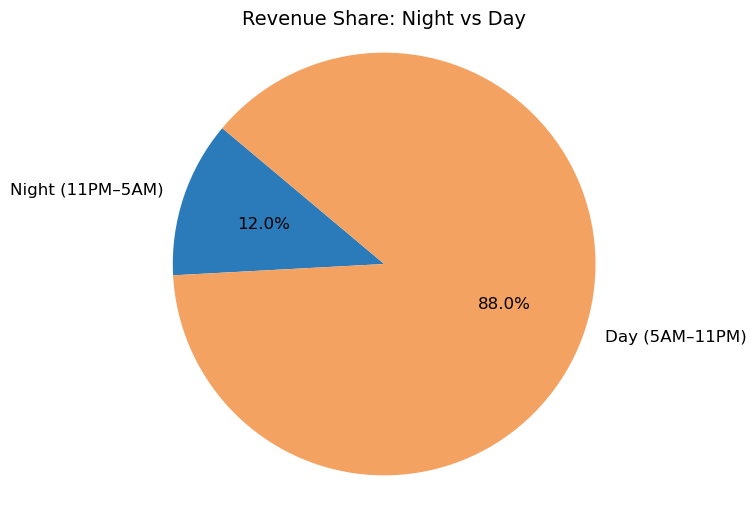

In [158]:
# Pie chart data
labels = ['Night (11PM–5AM)', 'Day (5AM–11PM)']
sizes = [night_revenue, day_revenue]
colors = ['#2b7bba', '#f4a261']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title('Revenue Share: Night vs Day', fontsize=14)
plt.axis('equal')  # Ensures pie is a circle
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [159]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out rows with zero or invalid values to avoid division errors
df_valid = df_merge[
    (df_merge['trip_distance'] > 0) & 
    (df_merge['passenger_count'] > 0)
].copy()

# passenger_count to get the total fare and distance
total_fare = df_valid.groupby(['passenger_count'])[['trip_distance','fare_amount']].sum()

# the average fare per mile for each passenger count
avg_fare_per_mile = total_fare['fare_amount'] / total_fare['trip_distance']

# the fare per mile per passenger
avg_fare_per_passenger = avg_fare_per_mile / total_fare.index

display(avg_fare_per_passenger)

passenger_count
1.0    5.704040
2.0    2.688942
3.0    1.847163
4.0    1.379964
5.0    1.133631
6.0    0.950446
dtype: float64

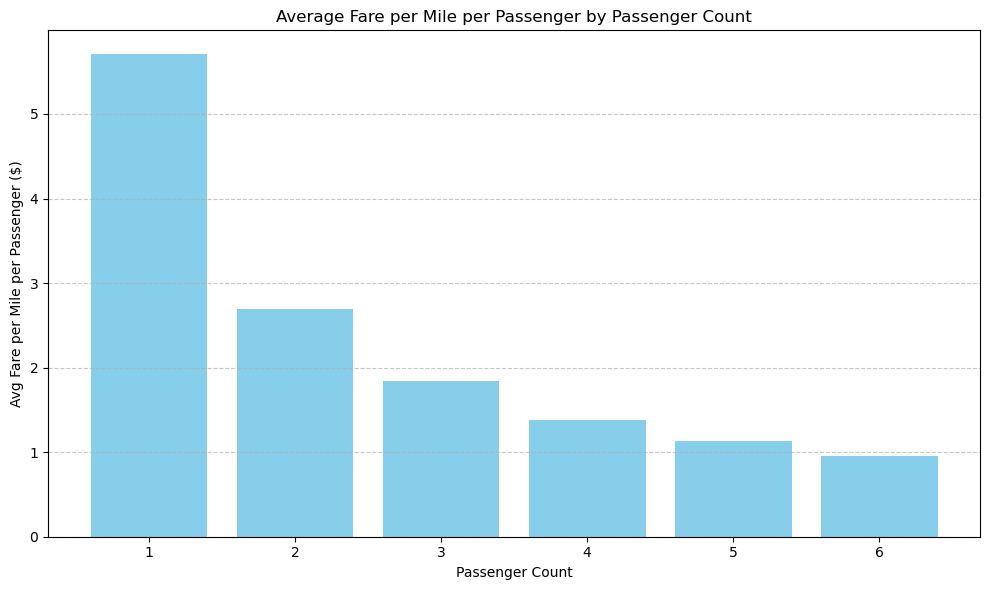

In [160]:
plt.figure(figsize=(10, 6))
plt.bar(avg_fare_per_passenger.index, avg_fare_per_passenger, color='skyblue')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare per Mile per Passenger ($)')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [161]:

# Group by pickup_hour and aggregate total_amount and trip_distance
agg_by_hour = df_merge.groupby('pickup_hour')[['fare_amount', 'trip_distance']].sum().reset_index()

# Calculate average fare per mile
agg_by_hour['avg_fare_per_mile'] = agg_by_hour['fare_amount'] / agg_by_hour['trip_distance']

agg_by_hour[['pickup_hour', 'avg_fare_per_mile']]


pickup_hour  avg_fare_per_mile
0             0           5.119212
1             1           5.223032
2             2           5.311015
3             3           5.189718
4             4           4.849972
5             5           4.536896
6             6           4.686486
7             7           5.237321
8             8           5.739017
9             9           5.884648
10           10           5.947006
11           11           6.095969
12           12           6.072836
13           13           5.927197
14           14           5.883163
15           15           5.958726
16           16           5.960753
17           17           6.084770
18           18           6.048324
19           19           5.728868
20           20           5.425050
21           21           5.368324
22           22           5.279859
23           23           5.100501

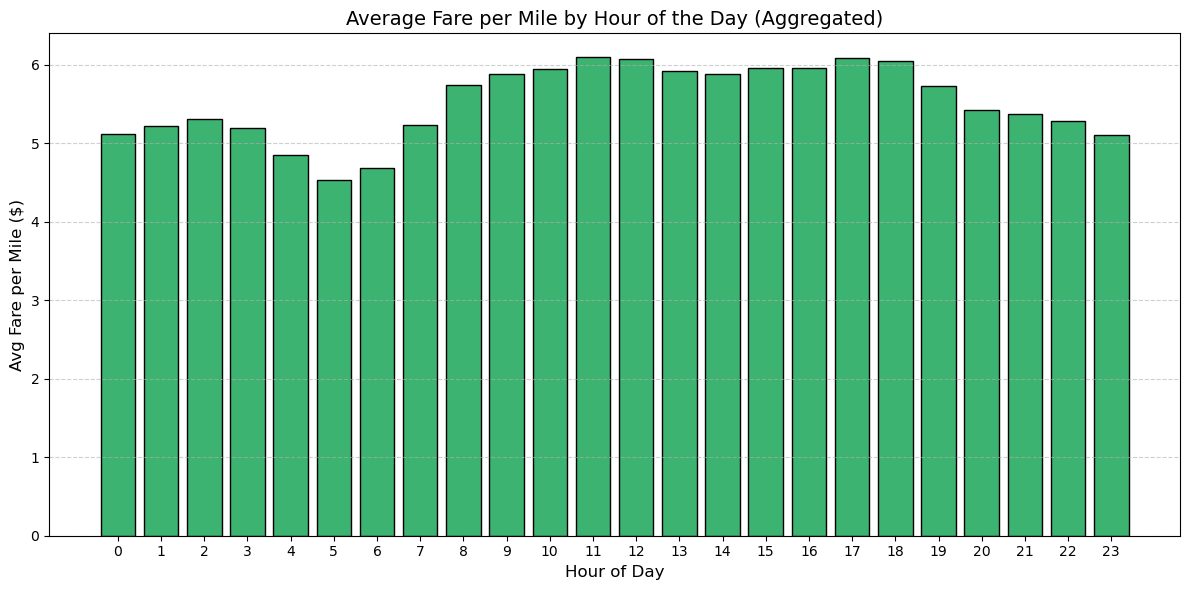

In [162]:
plt.figure(figsize=(12, 6))
plt.bar(agg_by_hour['pickup_hour'], agg_by_hour['avg_fare_per_mile'], color='mediumseagreen', edgecolor='black')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.title('Average Fare per Mile by Hour of the Day (Aggregated)', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [163]:
## Fare is high during daytime (9 am to 6 pm) and less in night hours (11 pm to 5 am)

In [164]:
df_merge

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1               2  2023-12-01 12:43:32   2023-12-01 12:50:05              1.0   
2               2  2023-12-01 14:43:52   2023-12-01 15:08:04              5.0   
3               2  2023-12-01 16:38:17   2023-12-01 16:51:10              1.0   
4               2  2023-12-01 19:03:03   2023-12-01 19:14:37              1.0   
...           ...                  ...                   ...              ...   
1763223         2  2023-02-24 10:01:33   2023-02-24 10:02:13              1.0   
1763224         2  2023-09-27 20:41:29   2023-09-27 20:41:36              4.0   
1763225         1  2023-10-17 11:01:12   2023-10-17 11:19:22              1.0   
1763226         2  2023-08-07 16:54:07   2023-08-07 17:20:25              1.0   
1763227         2  2023-03-09 12:59:12   2023-03-09 13:29:32              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.31         1.0                  N           163   
1                 0.87         1.0                  N           163   
2                 1.12         1.0                  N           163   
3                 0.42         1.0                  N           163   
4                 0.91         1.0                  N           163   
...                ...         ...                ...           ...   
1763223           0.59         1.0                  N            44   
1763224           0.00         5.0                  N           204   
1763225           7.10         1.0                  N           132   
1763226           9.20         1.0                  N           132   
1763227          13.31         1.0                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 162             1         10.0   1.00      0.5        3.00   
1                 162             1          7.9   0.00      0.5        2.00   
2                 162             1         17.7   0.00      0.5        0.00   
3                 162             1         11.4   2.50      0.5        3.58   
4                 162             1         10.7   2.50      0.5        3.44   
...               ...           ...          ...    ...      ...         ...   
1763223           204             2          4.4   0.00      0.5        0.00   
1763224           204             1         20.0   0.00      0.0        0.00   
1763225             2             2         29.6   1.75      0.5        0.00   
1763226             2             2         38.7   2.50      0.5        0.00   
1763227             2             2         53.4   0.00      0.5        0.00   

         tolls_amount  improvement_surcharge  congestion_surcharge  \
0                0.00                    0.3                   2.5   
1                0.00                    0.3                   2.5   
2                0.00                    0.3                   2.5   
3                0.00                    0.3                   2.5   
4                0.00                    0.3                   2.5   
...               ...                    ...                   ...   
1763223          0.00                    0.3                   0.0   
1763224          0.00                    0.3                   0.0   
1763225          0.00                    0.3                   0.0   
1763226          0.00                    0.3                   0.0   
1763227          2.45                    0.3                   0.0   

         pickup_hour  trip_duration  airport_fee_updated  total_amount  \
0                 23       8.766667                 0.00         17.30   
1                 12       6.550000                 0.00         13.20   
2                 14      24.200000                 0.00         21.00   
3                 16      12.883333                 0.00         20.78   
4          

In [165]:
# Group by day_of_week and aggregate
agg_by_day = df_merge.groupby(['day_of_week', 'day_name'])[['fare_amount', 'trip_distance']].sum().reset_index()

# Calculate average fare per mile
agg_by_day['avg_fare_per_mile'] = agg_by_day['fare_amount'] / agg_by_day['trip_distance']

# Sort by day_of_week
agg_by_day = agg_by_day.sort_values('day_of_week')
agg_by_day


day_of_week day_name  fare_amount  trip_distance  avg_fare_per_mile
0            0      Mon   4403939.93      817316.93           5.388289
1            1      Tue   4927288.33      847898.93           5.811174
2            2      Wed   5223481.09      883382.59           5.913045
3            3      Thu   5415362.49      917573.09           5.901832
4            4      Fri   5024903.63      873271.38           5.754115
5            5      Sat   4723598.15      820455.03           5.757291
6            6      Sun   4488752.30      853182.11           5.261189

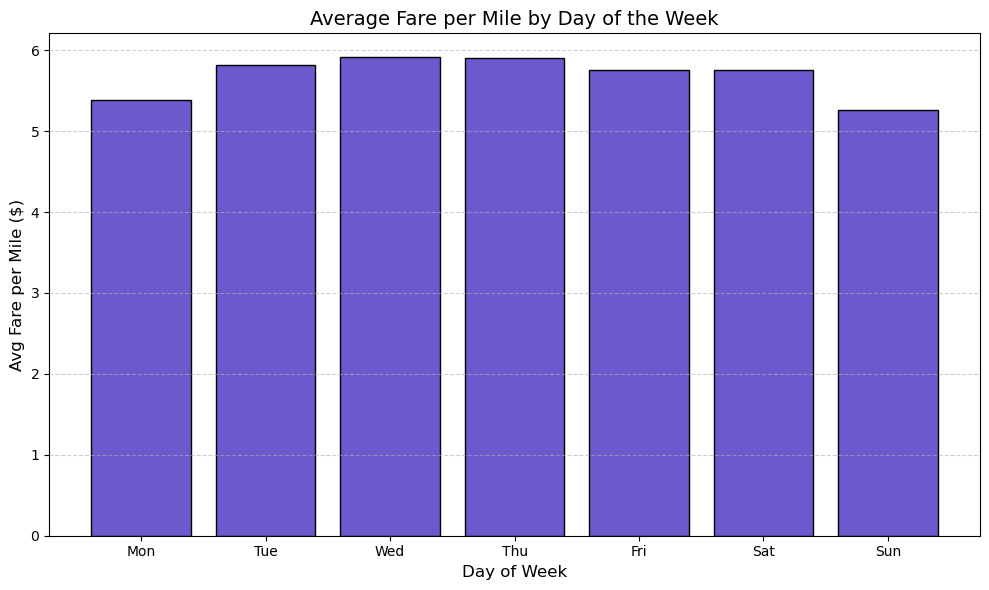

In [166]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(agg_by_day['day_name'], agg_by_day['avg_fare_per_mile'], color='slateblue', edgecolor='black')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.title('Average Fare per Mile by Day of the Week', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [167]:
## Sunday and Monday has low fare/ mile compared to other days

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [168]:
# Compare fare per mile for different vendors

# Group by pickup_hour and VendorID
agg_by_vendor_hour = df_merge.groupby(['pickup_hour', 'VendorID'])[['fare_amount', 'trip_distance']].sum().reset_index()

# Compute average fare per mile
agg_by_vendor_hour['avg_fare_per_mile'] = agg_by_vendor_hour['fare_amount'] / agg_by_vendor_hour['trip_distance']

# Map VendorID to vendor names
vendor_map = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
}
agg_by_vendor_hour['Vendor'] = agg_by_vendor_hour['VendorID'].map(vendor_map)

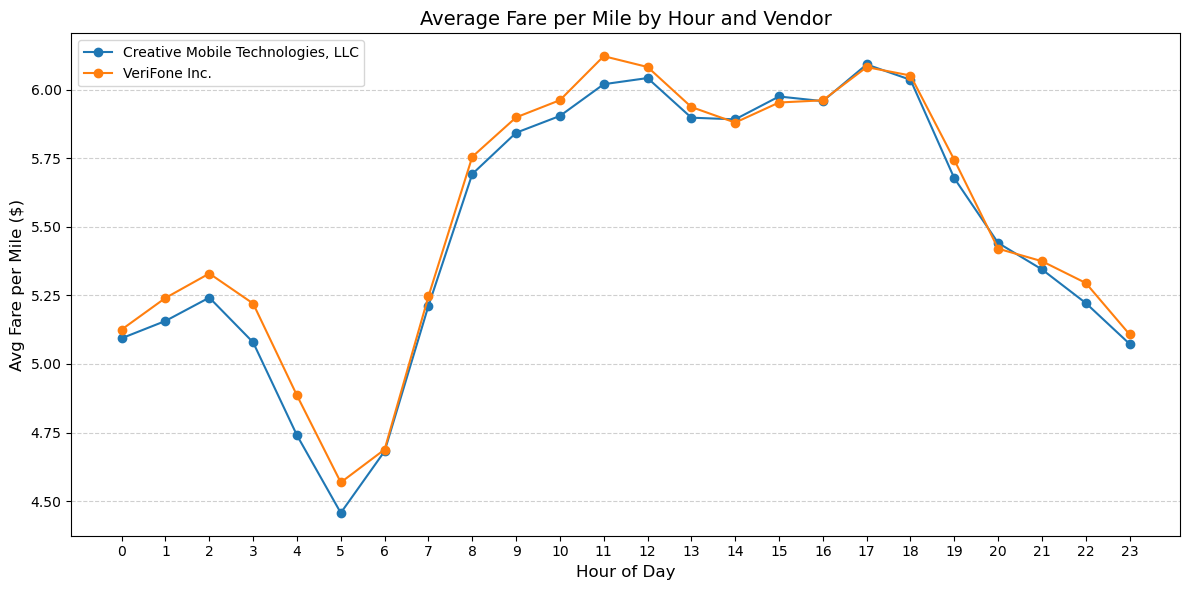

In [169]:
plt.figure(figsize=(12, 6))
for vendor in agg_by_vendor_hour['Vendor'].unique():
    vendor_data = agg_by_vendor_hour[agg_by_vendor_hour['Vendor'] == vendor]
    plt.plot(vendor_data['pickup_hour'], vendor_data['avg_fare_per_mile'], marker='o', label=vendor)

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.title('Average Fare per Mile by Hour and Vendor', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [170]:
## Creative Mobile Technologies, LLC has haigher fare per mile compared to VeriFone Inc.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [171]:
# Defining distance tiers


# Define vendor mapping
vendor_map = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
}

# Filter out zero or negative distances to avoid division errors
df_filtered = df_merge[df_merge['trip_distance'] > 0].copy()

# Create distance tier
def distance_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

# Group by VendorID and distance_tier
agg_by_vendor_tier = df_filtered.groupby(['VendorID', 'distance_tier'])[['fare_amount', 'trip_distance']].sum().reset_index()

# Compute average fare per mile
agg_by_vendor_tier['avg_fare_per_mile'] = agg_by_vendor_tier['fare_amount'] / agg_by_vendor_tier['trip_distance']

# Map vendor names
agg_by_vendor_tier['Vendor'] = agg_by_vendor_tier['VendorID'].map(vendor_map)

# Sort tiers logically
tier_order = ['≤ 2 miles', '2–5 miles', '> 5 miles']
agg_by_vendor_tier['distance_tier'] = pd.Categorical(agg_by_vendor_tier['distance_tier'], categories=tier_order, ordered=True)
agg_by_vendor_tier = agg_by_vendor_tier.sort_values(['distance_tier', 'VendorID'])

agg_by_vendor_tier

VendorID distance_tier  fare_amount  trip_distance  avg_fare_per_mile  \
2         1     ≤ 2 miles   2556275.01      292906.40           8.727276   
5         2     ≤ 2 miles   7459675.03      836184.12           8.921091   
0         1     2–5 miles   2194050.70      351355.10           6.244539   
3         2     2–5 miles   7003317.76     1092349.91           6.411240   
1         1     > 5 miles   3300092.36      783913.00           4.209769   
4         2     > 5 miles  11358933.47     2656371.53           4.276109   

                              Vendor  
2  Creative Mobile Technologies, LLC  
5                      VeriFone Inc.  
0  Creative Mobile Technologies, LLC  
3                      VeriFone Inc.  
1  Creative Mobile Technologies, LLC  
4                      VeriFone Inc.

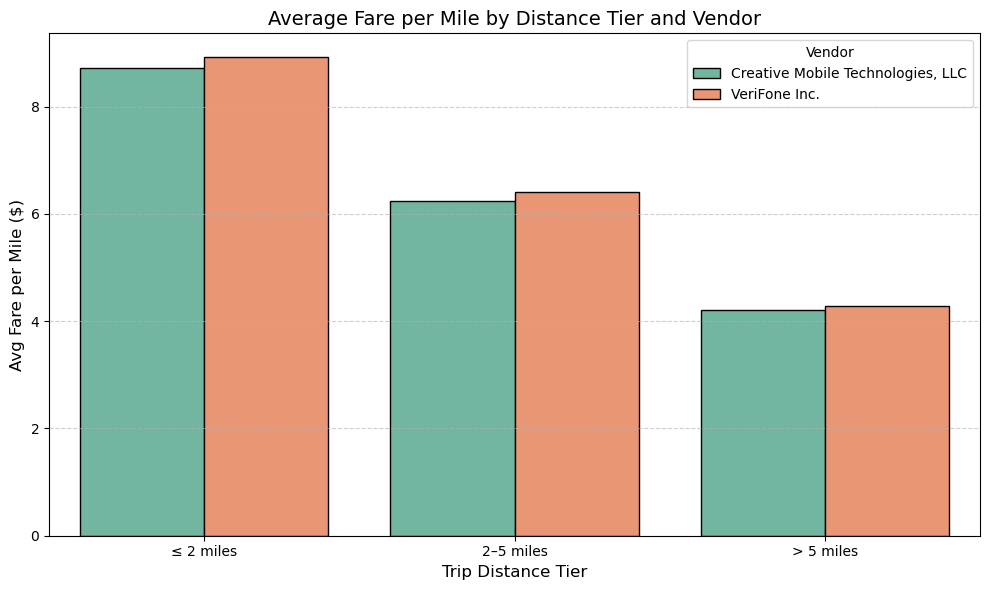

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agg_by_vendor_tier, x='distance_tier', y='avg_fare_per_mile', hue='Vendor', palette='Set2', edgecolor='black')

plt.xlabel('Trip Distance Tier', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.title('Average Fare per Mile by Distance Tier and Vendor', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Vendor')
plt.show()

In [173]:
## Creative Mobile Technologies, LLC has haigher fare per mile compared to VeriFone Inc in less than 2 miles trip distance,
## however in 2-5 miles and >5 miles VeriFone Inc avg fare per mile is more than Creative Mobile Technologies

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [174]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Filter valid fares to avoid division errors
df_valid = df_merge[(df_merge['fare_amount'] > 0) & (df_merge['trip_distance'] > 0)].copy()

# Compute tip percentage as (tip_amount / fare_amount) * 100
df_valid['tip_percent'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100


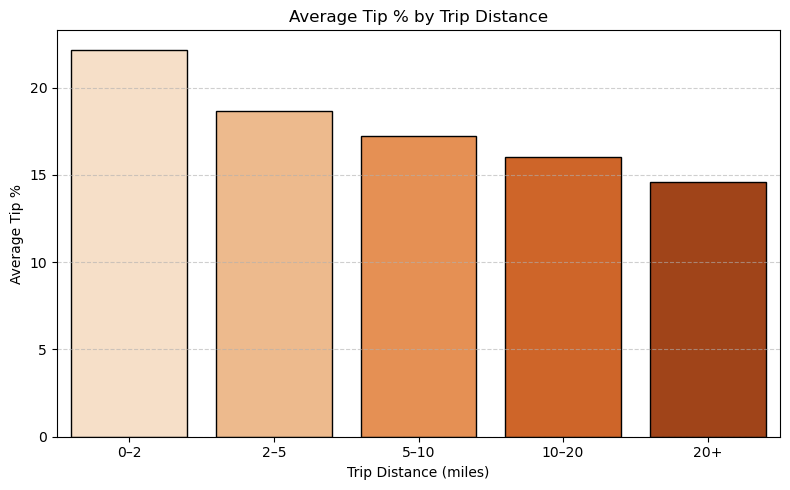

In [175]:
# Bin distances
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['0–2', '2–5', '5–10', '10–20', '20+']
df_valid['distance_bin'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels)

# Group and analyze
tip_by_distance = df_valid.groupby('distance_bin', observed=False)['tip_percent'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=tip_by_distance,
    x='distance_bin',
    y='tip_percent',
    hue='distance_bin',         # set hue to x variable
    palette='Oranges',
    edgecolor='black',
    legend=False                # hide redundant legend
)
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [176]:
# Tip relationship with passenger count 

tip_by_passenger = df_valid.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=tip_by_passenger,
    x='passenger_count',
    y='tip_percent',
    hue='passenger_count',      # assign x as hue
    palette='Purples',
    edgecolor='black',
    legend=False                # suppress redundant legend
)
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [177]:
## There is no clear relationship of tip_percent and passenger count

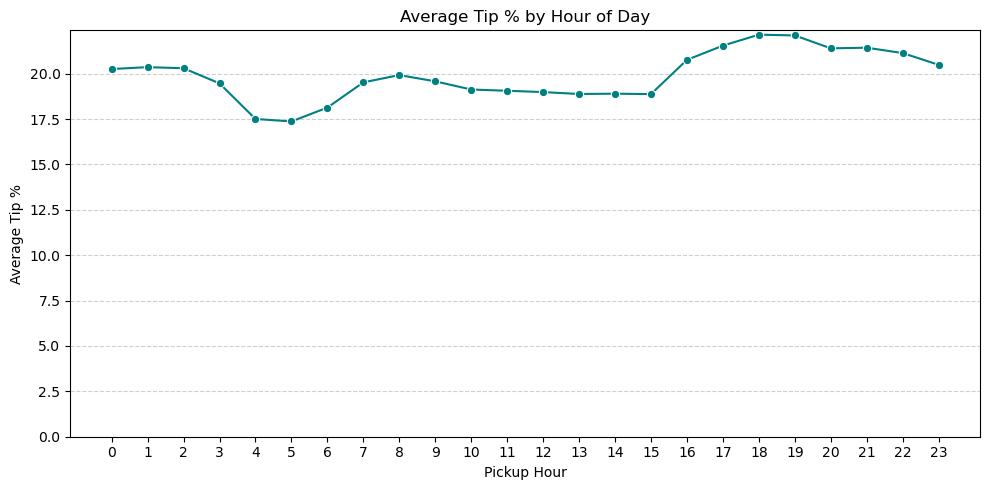

In [178]:
## Tip Amount relationship with pickup hour

tip_by_hour = df_valid.groupby('pickup_hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o', color='teal')
plt.title('Average Tip % by Hour of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip %')
plt.xticks(range(0, 24))
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [179]:
## Trips done in night time get more tip percentage

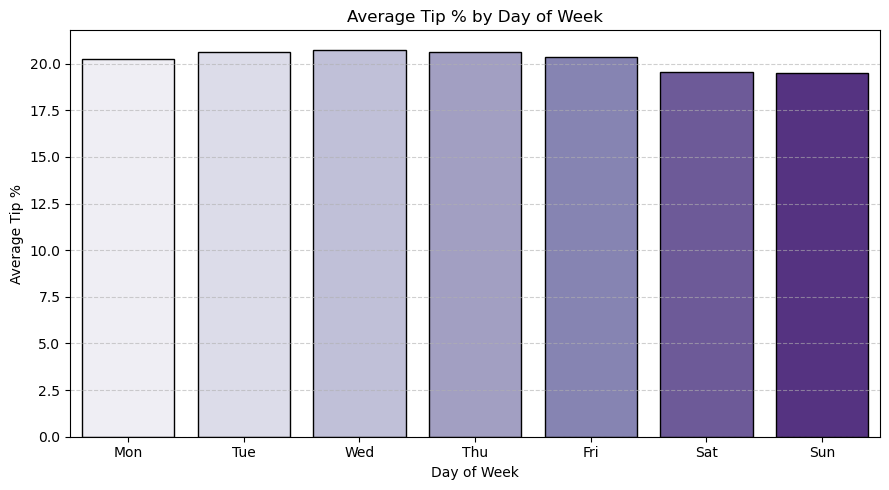

In [180]:

tip_by_day = df_valid.groupby(['day_of_week','day_name'])['tip_percent'].mean().reset_index()

plt.figure(figsize=(9, 5))


sns.barplot(
    data=tip_by_day,
    x='day_name',
    y='tip_percent',
    hue='day_name',      # assign x as hue
    palette='Purples',
    edgecolor='black',
    legend=False                # suppress redundant legend
)

plt.title('Average Tip % by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Tip %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [181]:
## As distance increases, average of tip amount as percentage of fare amount decreases

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [182]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = df_valid[df_valid['tip_percent'] < 10]
high_tip = df_valid[df_valid['tip_percent'] > 25]

# key features between low and high tip groups
avg_low_tip = low_tip[['trip_distance','fare_amount']].mean()
avg_high_tip = high_tip[['trip_distance','fare_amount']].mean()

print("Average features for low tip (tip percentage < 10%)")
print(avg_low_tip)
print("\nAverage features for high tip (tip percentage > 25%)")
print(avg_high_tip)


Average features for low tip (tip percentage < 10%)
trip_distance     3.803705
fare_amount      20.957682
dtype: float64

Average features for high tip (tip percentage > 25%)
trip_distance     2.292134
fare_amount      14.366891
dtype: float64


In [183]:
## Large trip distance and high fare amount led to low tip percentage 

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

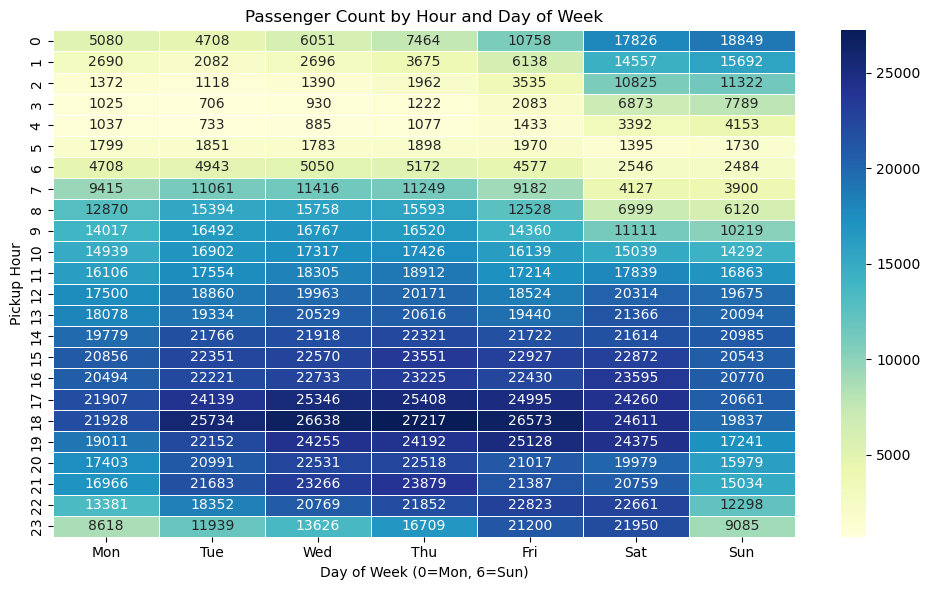

In [184]:
# See how passenger count varies across hours and days

# Group by pickup_hour and day_of_week, and count total passengers
passenger_by_time = df_merge.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].sum().reset_index()

# Pivot the data to create a matrix for heatmap
heatmap_data = passenger_by_time.pivot(index='pickup_hour', columns='day_of_week', values='passenger_count')

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data.columns = [day_names[d] for d in heatmap_data.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")

plt.title('Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Pickup Hour')
plt.tight_layout()
plt.show()




In [185]:
## It can be clearly seen in heatmap that most passengers travel on weekdays during 8 AM to 10 PM

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [186]:
# How does passenger count vary across zones
# creating df with passenger count >0 only
df_passenger = df_merge[df_merge.passenger_count>0]

# Group by pickup_zone and sum passenger counts
zone_passenger_counts = df_passenger.groupby('pickup_zone')['passenger_count'].sum().reset_index()

# Sort zones by total passenger count descending
zone_passenger_counts = zone_passenger_counts.sort_values(by='passenger_count', ascending=False)

zone_passenger_counts

pickup_zone  passenger_count
119                JFK Airport         138110.0
152             Midtown Center         117345.0
228      Upper East Side South         114515.0
227      Upper East Side North         102156.0
221  Times Sq/Theatre District          89736.0
..                         ...              ...
178              Port Richmond              1.0
212                  Stapleton              1.0
100                Great Kills              1.0
105        Grymes Hill/Clifton              1.0
175            Pelham Bay Park              1.0

[254 rows x 2 columns]

In [187]:
top_zones = zone_passenger_counts.head(15)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_zones,
    y='pickup_zone',
    x='passenger_count',
    hue='pickup_zone',     # assign y variable to hue
    palette='viridis',
    legend=False,          # hide redundant legend
)


plt.title('Top 15 Pickup Zones by Passenger Count')
plt.xlabel('Total Passenger Count')
plt.ylabel('Pickup Zone')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [188]:
### JFK Airport, Midtown center and Upper East Side South are top 3 zones in terms of passenger count

In [189]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df_passenger.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

avg_passenger_by_zone


PULocationID  avg_passenger_count
0               1             1.659459
1               2             1.000000
2               3             1.029412
3               4             1.445931
4               5             1.000000
..            ...                  ...
249           259             1.076923
250           260             1.311178
251           261             1.553753
252           262             1.335021
253           263             1.343538

[254 rows x 2 columns]

In [190]:
# Merge average passenger counts with zone names
avg_passenger_by_zone = zones.merge(avg_passenger_by_zone, right_on='PULocationID', left_on='LocationID', how='left')
avg_passenger_by_zone.sort_values(by='avg_passenger_count',ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
110       111    0.059931    0.000209   
194       195    0.131308    0.000802   
203       204    0.101912    0.000641   
11         12    0.036661    0.000042   
177       178    0.068253    0.000176   
..        ...         ...         ...   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   
109       110    0.103946    0.000526   
175       176    0.151995    0.000658   
244       245    0.095983    0.000466   

                                              zone  LocationID        borough  \
110                            Green-Wood Cemetery         111       Brooklyn   
194                                       Red Hook         195       Brooklyn   
203                              Rossville/Woodrow         204  Staten Island   
11                                    Battery Park          12      Manhattan   
177                            Ocean Parkway South         178       Brooklyn   
..                                             ...         ...            ...   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   
175                                        Oakwood         176  Staten Island   
244                                  West Brighton         245  Staten Island   

                                              geometry  PULocationID  \
110  POLYGON ((9.86e+05 1.8e+05, 9.86e+05 1.79e+05,...         111.0   
194  POLYGON ((9.82e+05 1.89e+05, 9.83e+05 1.89e+05...         195.0   
203  POLYGON ((9.28e+05 1.42e+05, 9.28e+05 1.42e+05...         204.0   
11   POLYGON ((9.8e+05 1.96e+05, 9.8e+05 1.96e+05, ...          12.0   
177  POLYGON ((9.92e+05 1.67e+05, 9.92e+05 1.67e+05...         178.0   
..                                                 ...           ...   
103  POLYGON ((9.73e+05 1.95e+05, 9.73e+05 1.95e+05...           NaN   
104  POLYGON ((9.8e+05 1.92e+05, 9.8e+05 1.92e+05, ...           NaN   
109  POLYGON ((9.51e+05 1.4e+05, 9.52e+05 1.39e+05,...           NaN   
175  POLYGON ((9.5e+05 1.49e+05, 9.5e+05 1.49e+05, ...           NaN   
244  POLYGON ((9.57e+05 1.73e+05, 9.57e+05 1.72e+05...           NaN   

     avg_passenger_count  
110             2.000000  
194             1.855556  
203             1.800000  
11              1.760652  
177             1.727273  
..                   ...  
103                  NaN  
104                  NaN  
109                  NaN  
175                  NaN  
244                  NaN  

[263 rows x 9 columns]

<Figure size 1200x1000 with 0 Axes>

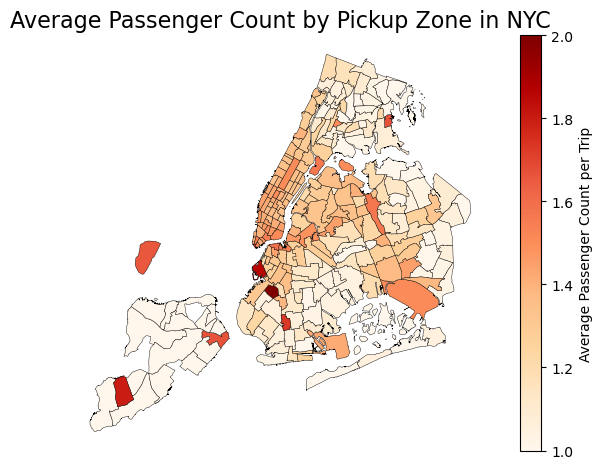

In [191]:
# Ensure the dataframe is a GeoDataFrame
gdf = avg_passenger_by_zone

# Set coordinate reference system if not set (NAD83 for NYC Taxi Zones)
if gdf.crs is None:
    gdf.set_crs(epsg=2263, inplace=True)  # NYC spatial reference

# Plot
plt.figure(figsize=(12, 10))
gdf.plot(
    column='avg_passenger_count',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    legend_kwds={'label': "Average Passenger Count per Trip"},
)

plt.title('Average Passenger Count by Pickup Zone in NYC', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [192]:
## Green-Wood Cemetery have highest average passenger count of 2.0,we can see scattered distribution of average passenger count,
## zones in nort west and south east have higher average passenger count compared to zones in other area.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [193]:
# How often is each surcharge applied?
extra_charges_columns = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge']
# Check if extra charges were applied (1 if applied, 0 otherwise)
for col in extra_charges_columns:
    df_merge[f'{col}_applied'] = df_merge[col].apply(lambda x: 1 if x > 0 else 0)

# Group by pickup zone and calculate mean application rate
zone_extra_charges = df_merge.groupby('pickup_zone')[
    [f'{col}_applied' for col in extra_charges_columns]
].mean().reset_index()


In [194]:
zone_extra_charges 

pickup_zone  extra_applied  mta_tax_applied  \
0    Allerton/Pelham Gardens       0.000000         0.941176   
1              Alphabet City       0.810479         0.989409   
2              Arden Heights       0.000000         1.000000   
3    Arrochar/Fort Wadsworth       0.333333         0.666667   
4                    Astoria       0.418663         0.970996   
..                       ...            ...              ...   
249       Woodlawn/Wakefield       0.025641         0.974359   
250                 Woodside       0.401813         0.936556   
251       World Trade Center       0.560051         0.985588   
252           Yorkville East       0.477890         0.997707   
253           Yorkville West       0.580951         0.997419   

     congestion_surcharge_applied  improvement_surcharge_applied  
0                        0.000000                       1.000000  
1                        0.977146                       1.000000  
2                        0.000000                       1.000000  
3                        0.000000                       1.000000  
4                        0.235813                       1.000000  
..                            ...                            ...  
249                      0.025641                       1.000000  
250                      0.265861                       1.000000  
251                      0.987082                       1.000000  
252                      0.997188                       0.999957  
253                      0.991467                       0.999971  

[254 rows x 5 columns]

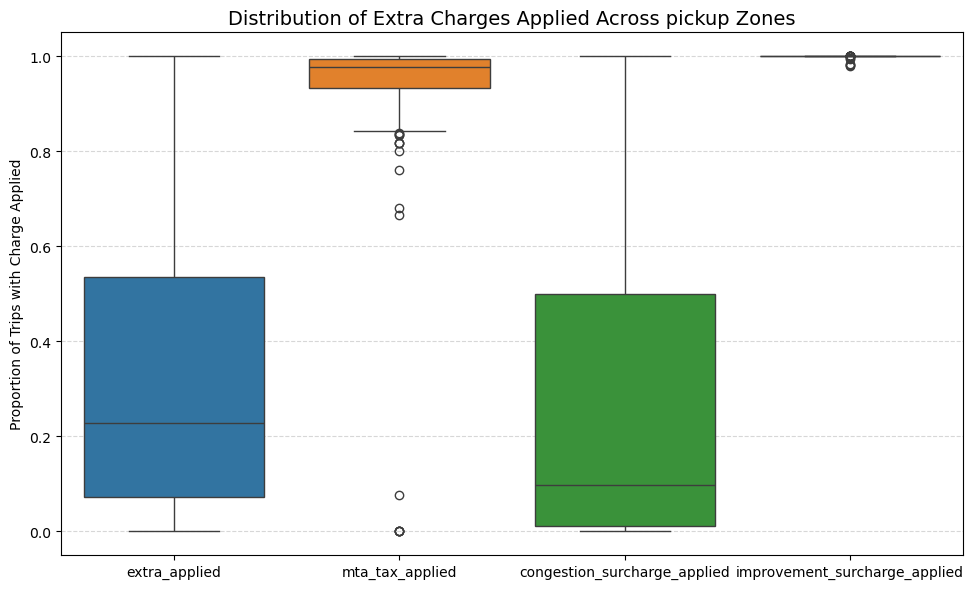

In [195]:
charge_cols = ['extra_applied', 'mta_tax_applied', 'congestion_surcharge_applied', 'improvement_surcharge_applied']

plt.figure(figsize=(10, 6))
sns.boxplot(data=zone_extra_charges [charge_cols])
plt.title('Distribution of Extra Charges Applied Across pickup Zones', fontsize=14)
plt.ylabel('Proportion of Trips with Charge Applied')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [196]:
## mta_tax and improvement_surchare are applied in almost all the trips across pickup zones
## Median proportion of trips where extra charge is applied across pickup zones is 25%
## Median proportion of trips where congestion charge is applied across pickup zones is 10%

In [197]:
## Top 10 pickup zones where extra charges are applied
zone_extra_charges[['pickup_zone','extra_applied']].sort_values(by='extra_applied',ascending=False).head(10)

pickup_zone  extra_applied
54                Crotona Park       1.000000
212                  Stapleton       1.000000
175            Pelham Bay Park       1.000000
178              Port Richmond       1.000000
147            Mariners Harbor       1.000000
190              Rikers Island       1.000000
129          LaGuardia Airport       0.986901
65               East Elmhurst       0.836664
139            Lower East Side       0.827689
245  Williamsburg (North Side)       0.810700

In [198]:
## Top 10 pickup zones where congestion charges are applied
zone_extra_charges[['pickup_zone','congestion_surcharge_applied']].sort_values(by='congestion_surcharge_applied',ascending=False).head(10)

pickup_zone  congestion_surcharge_applied
122                    Jamaica Bay                      1.000000
54                    Crotona Park                      1.000000
9                     Battery Park                      0.998747
239                   West Village                      0.997848
228          Upper East Side South                      0.997810
220  Sutton Place/Turtle Bay North                      0.997674
132                Lenox Hill West                      0.997312
252                 Yorkville East                      0.997188
225                       Union Sq                      0.997179
104        Greenwich Village South                      0.997162

In [199]:
# Group by dropoff zone and calculate mean application rate
zone_extra_charges = df_merge.groupby('dropoff_zone')[
    [f'{col}_applied' for col in extra_charges_columns]
].mean().reset_index()

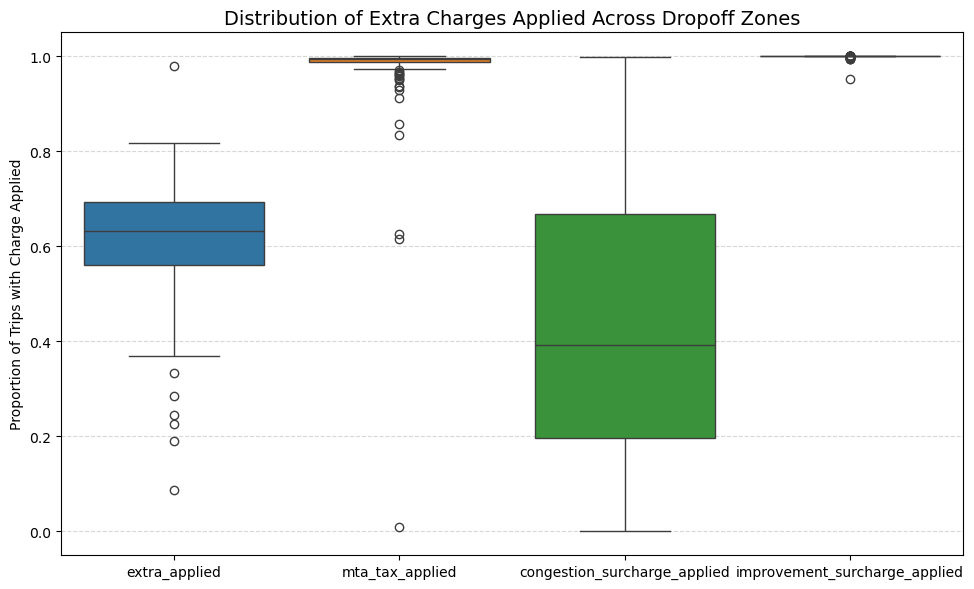

In [200]:
charge_cols = ['extra_applied', 'mta_tax_applied', 'congestion_surcharge_applied', 'improvement_surcharge_applied']

plt.figure(figsize=(10, 6))
sns.boxplot(data=zone_extra_charges [charge_cols])
plt.title('Distribution of Extra Charges Applied Across Dropoff Zones', fontsize=14)
plt.ylabel('Proportion of Trips with Charge Applied')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [201]:
## mta_tax and improvement_surchare are applied in almost all the trips across dropoff zones
## Median proportion of trips where extra charge is applied across dropoff zones is 65%
## Median proportion of trips where congestion charge is applied across pickup zones is 40%

In [202]:
## Top 10 dropoff zones where extra charges are applied
zone_extra_charges[['dropoff_zone','extra_applied']].sort_values(by='extra_applied',ascending=False).head(10)

dropoff_zone  extra_applied
131        LaGuardia Airport       0.980176
76         East Williamsburg       0.817940
12   Bay Terrace/Fort Totten       0.813472
37           Carroll Gardens       0.811090
49               Cobble Hill       0.803905
238            West Brighton       0.800000
104               Greenpoint       0.798865
167             North Corona       0.797814
182         Prospect Heights       0.797732
175               Park Slope       0.796530

In [203]:
## Top 10 pickup zones where congestion charges are applied
zone_extra_charges[['dropoff_zone','congestion_surcharge_applied']].sort_values(by='congestion_surcharge_applied',ascending=False).head(10)

dropoff_zone  congestion_surcharge_applied
230           Upper East Side South                      0.998404
222   Sutton Place/Turtle Bay North                      0.998347
242                    West Village                      0.998322
106         Greenwich Village South                      0.998135
217  Stuy Town/Peter Cooper Village                      0.998098
105         Greenwich Village North                      0.998040
137             Little Italy/NoLiTa                      0.998035
9                      Battery Park                      0.998010
239       West Chelsea/Hudson Yards                      0.997996
134                 Lenox Hill West                      0.997976

In [204]:
# Group by pickup_hour and calculate mean application rate
pickup_hour_extra_charges = df_merge.groupby('pickup_hour')[
    [f'{col}_applied' for col in extra_charges_columns]
].mean().reset_index()

In [205]:
pickup_hour_extra_charges

pickup_hour  extra_applied  mta_tax_applied  congestion_surcharge_applied  \
0             0       0.962130         0.993857                      0.915847   
1             1       0.972480         0.992613                      0.937087   
2             2       0.978185         0.989277                      0.952071   
3             3       0.968464         0.981929                      0.944653   
4             4       0.908476         0.964832                      0.892279   
5             5       0.853027         0.963440                      0.816363   
6             6       0.319398         0.984526                      0.855219   
7             7       0.293180         0.991201                      0.907700   
8             8       0.291404         0.993535                      0.926821   
9             9       0.299948         0.993587                      0.928715   
10           10       0.302413         0.993876                      0.929148   
11           11       0.296411         0.993384                      0.936134   
12           12       0.295045         0.992969                      0.935722   
13           13       0.296521         0.991019                      0.933337   
14           14       0.298108         0.990234                      0.929873   
15           15       0.294531         0.991230                      0.928828   
16           16       0.759212         0.991821                      0.928924   
17           17       0.795589         0.993793                      0.938025   
18           18       0.805221         0.994781                      0.944848   
19           19       0.798014         0.995755                      0.940066   
20           20       0.954268         0.996116                      0.936432   
21           21       0.966236         0.996571                      0.937186   
22           22       0.964902         0.996590                      0.931184   
23           23       0.961558         0.995555                      0.907108   

    improvement_surcharge_applied  
0                        0.999980  
1                        0.999970  
2                        0.999908  
3                        0.999858  
4                        0.999778  
5                        1.000000  
6                        1.000000  
7                        0.999936  
8                        0.999985  
9                        0.999933  
10                       0.999988  
11                       0.999989  
12                       0.999969  
13                       0.999940  
14                       0.999925  
15                       0.999936  
16                       0.999982  
17                       0.999966  
18                       0.999976  
19                       0.999982  
20                       1.000000  
21                       0.999990  
22                       0.999989  
23                       1.000000

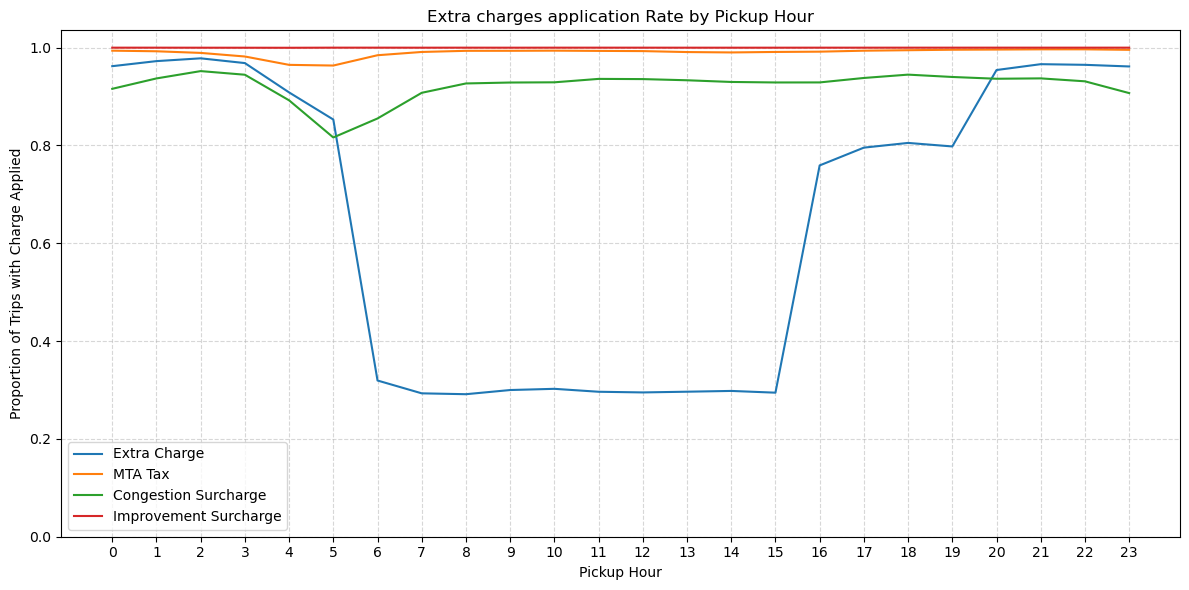

In [206]:

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each surcharge line
plt.plot(pickup_hour_extra_charges['pickup_hour'], pickup_hour_extra_charges['extra_applied'], label='Extra Charge')
plt.plot(pickup_hour_extra_charges['pickup_hour'], pickup_hour_extra_charges['mta_tax_applied'], label='MTA Tax')
plt.plot(pickup_hour_extra_charges['pickup_hour'], pickup_hour_extra_charges['congestion_surcharge_applied'], label='Congestion Surcharge')
plt.plot(pickup_hour_extra_charges['pickup_hour'], pickup_hour_extra_charges['improvement_surcharge_applied'], label='Improvement Surcharge')

# Customize plot
plt.title('Extra charges application Rate by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Proportion of Trips with Charge Applied')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))  # Ensure all 24 hours are shown
plt.ylim(bottom=0) 
plt.tight_layout()
plt.show()


In [207]:
## mta_tax and improvement_surchare are applied in almost all the trips across pickup hours
## congestion surchages is applied in almost 90% of trips across pickup hours, however, a dip can be seen at 5 am.
## extra charges is applied in less than 30% of trips between 6 am and 3 pm, for rest pickup hours it is applied in ~80% of trips.
## extra charges is applied highest in night trips (8 pm to 3 am)

In [208]:
day_extra_charges = df_merge.groupby(['day_of_week','day_name'])[
    [f'{col}_applied' for col in extra_charges_columns]
].mean().reset_index()

day_extra_charges

day_of_week day_name  extra_applied  mta_tax_applied  \
0            0      Mon       0.620370         0.992622   
1            1      Tue       0.641192         0.994193   
2            2      Wed       0.654671         0.994205   
3            3      Thu       0.658820         0.993531   
4            4      Fri       0.677119         0.992889   
5            5      Sat       0.521849         0.993103   
6            6      Sun       0.514894         0.990516   

   congestion_surcharge_applied  improvement_surcharge_applied  
0                      0.915425                       0.999968  
1                      0.931298                       0.999953  
2                      0.935685                       0.999978  
3                      0.936216                       0.999971  
4                      0.930686                       0.999973  
5                      0.940664                       0.999984  
6                      0.917552                       0.999946

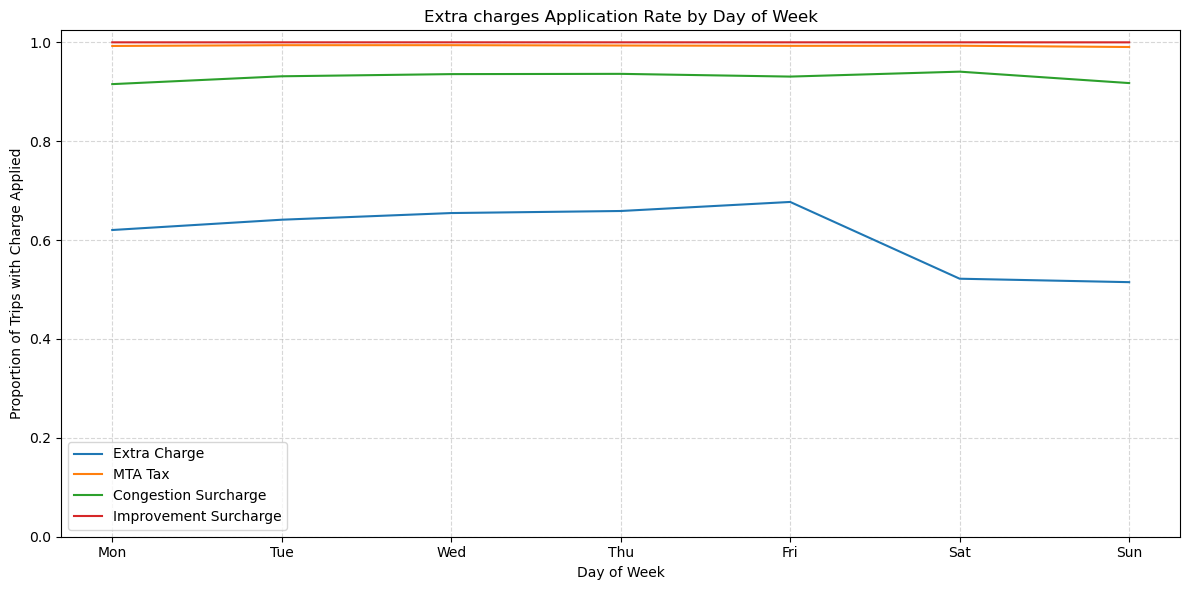

In [209]:

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each surcharge
plt.plot(day_extra_charges['day_name'], day_extra_charges['extra_applied'], label='Extra Charge')
plt.plot(day_extra_charges['day_name'], day_extra_charges['mta_tax_applied'], label='MTA Tax')
plt.plot(day_extra_charges['day_name'], day_extra_charges['congestion_surcharge_applied'], label='Congestion Surcharge')
plt.plot(day_extra_charges['day_name'], day_extra_charges['improvement_surcharge_applied'], label='Improvement Surcharge')

# Customize chart
plt.title('Extra charges Application Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Trips with Charge Applied')
plt.legend()
plt.ylim(bottom=0) 
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [210]:
## ## mta_tax and improvement_surchare are applied in almost all the trips across different days of week
## congestion surchages is applied relatively less on sunday and monday.
## extra charges is applied less on weekend (50% of trips) relative to weekdays (65% of trips)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. **Smart Fleet Allocation During Rush Hours**:

**Afternoon Peak (2 PM – 7 PM)**: The ride demand surges between 2 PM and 7 PM, with the busiest period observed from 5 PM to 6 PM. To manage this effectively, dispatch efforts should be concentrated in high-demand zones like **Midtown Center**, **JFK Airport**, and **Upper East Side South**. A responsive fleet assignment strategy that adjusts vehicle availability based on live demand trends will prevent long wait times and enhance service reliability.

**Late-Night Hours (11 PM – 5 AM)**: Although trip volume dips at night, these hours are ideal for rebalancing the fleet. Vehicles can be tactically positioned near expected morning hotspots or temporarily withdrawn for routine maintenance. This reduces idle fleet costs and prepares for the next demand spike.

2. **Weekday vs Weekend Demand Patterns**:

**Weekdays**: Congestion and ride demand are notably higher on **Wednesdays and Thursdays**, especially in the later part of the day. Ensuring a strong fleet presence during these specific windows will help capture more trips. Historical ride data can guide optimal vehicle distribution.

**Weekends**: **Saturdays** stand out with the highest trip counts, likely fueled by recreational and tourism-driven travel. To meet this demand, deploy more vehicles in core entertainment districts and areas frequented by visitors and leisure-seekers.

3. **Targeted Dispatch by Zone**:

**High-Demand Locations**: Neighborhoods like **JFK Airport** and **Midtown Center** consistently report high trip volume during busy hours. By actively tracking ride requests and reallocating vehicles to these hot zones, wait times can be significantly reduced. Leveraging **surge pricing** in these areas can also draw more drivers at critical times, helping balance supply-demand pressures.

4. **Flexible Fare Strategies and Surcharges**:

**Surge Pricing Application**: **Dynamic pricing** is essential when demand peaks. It helps ensure enough vehicles are available while maximizing earnings during high-traffic periods. Focus on applying surge rates strategically in regions like **Midtown Center** and **JFK Airport** during known demand spikes.

**Adaptive Surcharge Policies**: Analyzing the timing and location of fees like **congestion** or **airport surcharges** can inform better fare structuring. These surcharges should remain flexible, adjusted based on real-time traffic and ride activity to reflect true demand pressures.

5. **Demand-Based Dispatch Customization**:

**Serving Large Rider Groups**: In tourist-centric or high-occupancy areas, it’s advantageous to deploy **larger-capacity vehicles** (like vans or SUVs) that can serve groups more efficiently. This alignment between vehicle type and rider need enhances both user satisfaction and trip throughput.

**High-Frequency Short Trips**: In districts where quick, under-2-mile rides dominate—such as **Midtown East** or **Upper East Side North**—fleet strategy should emphasize **fast vehicle turnover**. Assigning compact, agile vehicles to these areas will allow multiple trips per hour, maximizing earnings and service availability.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. **Strategic Dispatching During Busy Hours**:

**Afternoon Rush (2 PM – 7 PM)**: The highest demand occurs in the late afternoon, peaking between **5 PM and 6 PM**. To match this surge, it’s crucial to position more vehicles in high-traffic zones such as **Midtown Center** and **JFK Airport**. Other areas like **Midtown East** and **Upper East Side South** should also be prioritized during this window to ensure coverage where trip volume intensifies.

2. **Tailored Weekday and Weekend Operations**:

**Weekday Focus**: **Wednesdays and Thursdays** show the greatest ride volumes, while **Mondays** remain relatively quiet. Business hubs like **Midtown East** should have additional vehicle availability during the midweek to accommodate commuter and business-related traffic.

**Weekend Strategy**: With increased leisure activity on weekends, especially around **Saturday**, fleet resources should be redistributed to high-footfall zones like **Times Square**, **Central Park**, and **JFK Airport**. These areas attract tourists and social activity, requiring enhanced fleet visibility.

3. **Seasonal Fleet Planning**:

**High-Volume Months (May & October)**: These months register the most rides and revenue, likely due to favorable travel conditions. During these periods, allocate more vehicles to hotspots like **JFK Airport** and **Times Square** to handle the influx efficiently.

**Low-Demand Periods (e.g., August)**: In quieter months, particularly **August**, reduce the fleet in tourist-heavy areas and shift the focus to zones with steady local ridership. This approach helps maintain efficiency without underutilizing the fleet.

4. **Optimizing Nighttime Coverage**:

**Late-Night Operations (11 PM – 5 AM)**: Though overall demand drops at night, certain locations such as **JFK Airport** and **Midtown** continue to see ride requests. Concentrating night fleet resources in these zones, while scaling back in quieter areas like **Upper East Side South**, ensures optimal vehicle deployment and cost control during off-peak hours.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. **Fare Scaling Based on Distance and Travel Time**:  
There is **a strong positive correlation** between **trip distance** and **fare value** (**0.95**). While longer distances significantly increase **fare amounts**, the impact of **trip duration** is notably weaker (**0.27**). Adopting **a dynamic pricing model** that primarily adjusts for **distance**, with a secondary consideration for **duration**, can enhance profitability for **extended** and **time-intensive** rides.  
- **Competitive Advantage**: Offering **lower rates** for **shorter trips** keeps **customers engaged**, while **higher charges** on **longer rides** help absorb **operational costs**.

2. **Time-Sensitive Fare Adjustments**:  
Apply **surge-based pricing** during **high-demand periods** such as **rush hours** to **boost earnings**. During **low-traffic hours** (e.g., **late nights** and **early mornings**), introduce **discounted rates** to **stimulate usage** and increase **ridership** when **demand** is typically low.  
- **Competitive Advantage**: **Surge pricing** maximizes **revenue** when **demand peaks**, while **off-hour discounts** keep **demand steady** and help maximize **fleet utilization**.

3. **Pricing Strategy Based on Rider Count**:  
The link between **passenger count** and **fare value** is **very weak** (**0.04**), suggesting that **current fare models** don't capture **potential revenue** from **group rides**. Introduce **multi-passenger fare options** or **supplemental pricing** for **trips with additional passengers**, especially if the journey requires **more stops** or **larger vehicles**.  
- **Competitive Advantage**: Enables **better monetization** of **group travel** while preserving **fair pricing** for **solo passengers**, increasing overall **trip profitability**.

4. **Zone and Time-Based Surcharge Strategy**:  
Fees like **airport surcharges**, **traffic congestion fees**, and **service charges** are currently applied **selectively**. Adjust **surcharge rates** based on **location**, **trip length**, or **peak hours**. For example, implement **higher surcharges** near **JFK Airport** during **busy times** to cover **elevated costs**.  
- **Competitive Advantage**: Aligns **pricing** with **real-time cost structures**, improving **revenue** without negatively affecting **price-sensitive zones**.
